In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import seaborn as sns
from scipy import stats
import xgboost as xgb
from scipy.stats import norm
import xgboost as xgb 
from xgboost.sklearn import XGBRegressor  
from sklearn.grid_search import GridSearchCV 

In [3]:
import xgboost as xgb
import numpy as np

data = np.random.rand(5,10) # 5 entities, each contains 10 features
label = np.random.randint(2, size=5) # binary target
dtrain = xgb.DMatrix( data, label=label)

dtest = dtrain

param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist  = [(dtest,'eval'), (dtrain,'train')]

num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist )

bst.dump_model('dump.raw.txt')

[0]	eval-auc:0.5	train-auc:0.5
[1]	eval-auc:0.5	train-auc:0.5
[2]	eval-auc:0.5	train-auc:0.5
[3]	eval-auc:0.5	train-auc:0.5
[4]	eval-auc:0.5	train-auc:0.5
[5]	eval-auc:0.5	train-auc:0.5
[6]	eval-auc:0.5	train-auc:0.5
[7]	eval-auc:0.5	train-auc:0.5
[8]	eval-auc:0.5	train-auc:0.5
[9]	eval-auc:0.5	train-auc:0.5


In [4]:
# paths

from xgboost.sklearn import XGBClassifier
train_path = 'D:/Advanced Regression/train.csv'
test_path = 'D:/Advanced Regression/test.csv'

In [4]:
print(dir(xgb))

['Booster', 'DMatrix', 'VERSION_FILE', 'XGBClassifier', 'XGBModel', 'XGBRegressor', '__all__', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '__version__', 'absolute_import', 'callback', 'compat', 'core', 'cv', 'f', 'libpath', 'os', 'plot_importance', 'plot_tree', 'plotting', 'rabit', 'sklearn', 'to_graphviz', 'train', 'training']


In [5]:
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)
df_all = pd.concat((data_train.loc[:, 'Id':'SaleCondition'], data_test.loc[:, 'Id':'SaleCondition']))

In [6]:
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
target = data_train['SalePrice']
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


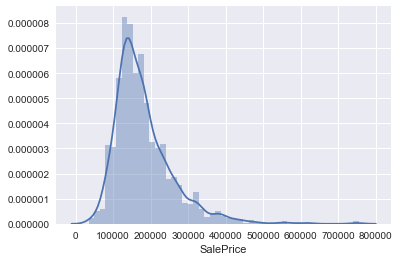

In [10]:
hist = pd.DataFrame({'price':data_train['SalePrice'], 'log_price': np.log1p(data_train['SalePrice'])})
sns.distplot(data_train['SalePrice'])

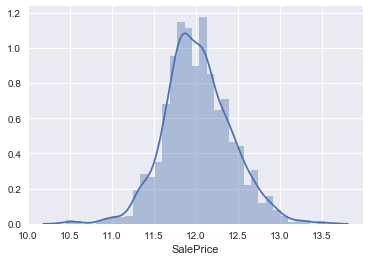

In [11]:
sns.distplot(np.log1p(data_train['SalePrice']))

In [6]:
data_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

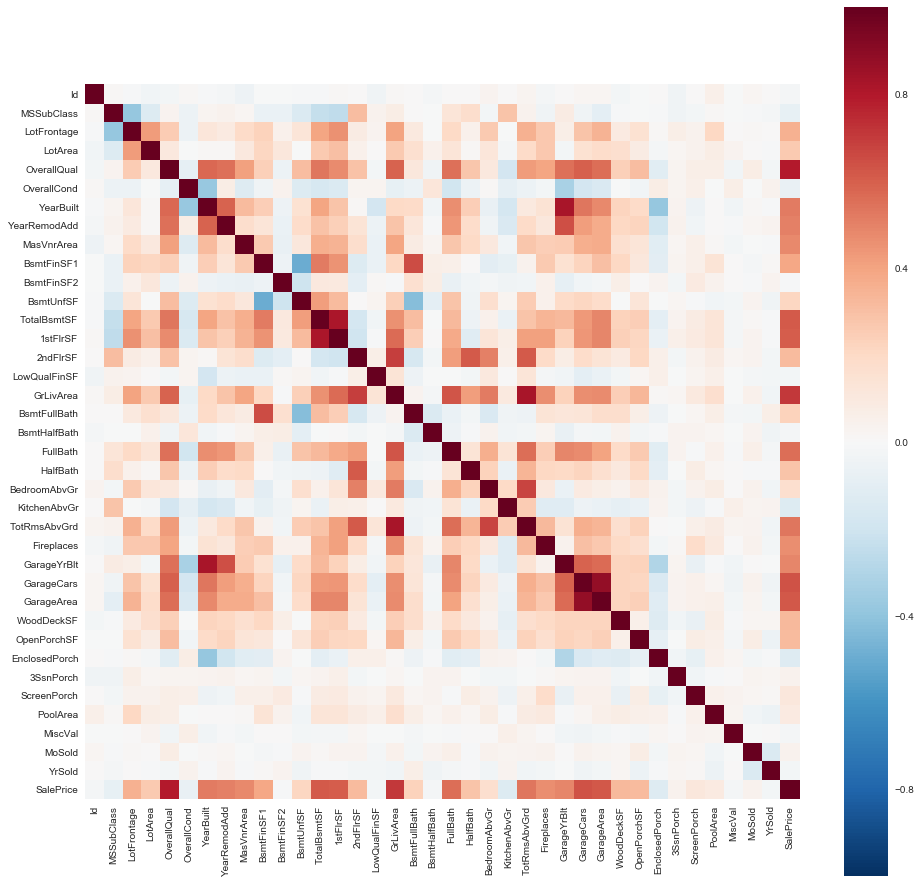

In [7]:
corr = data_train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, vmax=1, square=True)

Correlations (Target):

SalePrice with OvealQual
SalePrice with GrLivArea

Correlations (Multicollinearity):

GarageCars with GarageArea

GarageYrBlt with YearBuilt

1stFlrSF with TotalBsmtSF

TotRmsAbvGrd with GrLivArea

In [8]:
import operator

corr_dict = corr['SalePrice'].to_dict()
del corr_dict['SalePrice']
corr_sorted = sorted(corr_dict.items(), key=operator.itemgetter(1), reverse=True)
for k,v in corr_sorted:
    print("%s: \t%f" % (k, v)) 
    
# OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, 
# YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces

# Correlation between GarageCars/GarageArea, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd

OverallQual: 	0.790982
GrLivArea: 	0.708624
GarageCars: 	0.640409
GarageArea: 	0.623431
TotalBsmtSF: 	0.613581
1stFlrSF: 	0.605852
FullBath: 	0.560664
TotRmsAbvGrd: 	0.533723
YearBuilt: 	0.522897
YearRemodAdd: 	0.507101
GarageYrBlt: 	0.486362
MasVnrArea: 	0.477493
Fireplaces: 	0.466929
BsmtFinSF1: 	0.386420
LotFrontage: 	0.351799
WoodDeckSF: 	0.324413
2ndFlrSF: 	0.319334
OpenPorchSF: 	0.315856
HalfBath: 	0.284108
LotArea: 	0.263843
BsmtFullBath: 	0.227122
BsmtUnfSF: 	0.214479
BedroomAbvGr: 	0.168213
ScreenPorch: 	0.111447
PoolArea: 	0.092404
MoSold: 	0.046432
3SsnPorch: 	0.044584
BsmtFinSF2: 	-0.011378
BsmtHalfBath: 	-0.016844
MiscVal: 	-0.021190
Id: 	-0.021917
LowQualFinSF: 	-0.025606
YrSold: 	-0.028923
OverallCond: 	-0.077856
MSSubClass: 	-0.084284
EnclosedPorch: 	-0.128578
KitchenAbvGr: 	-0.135907


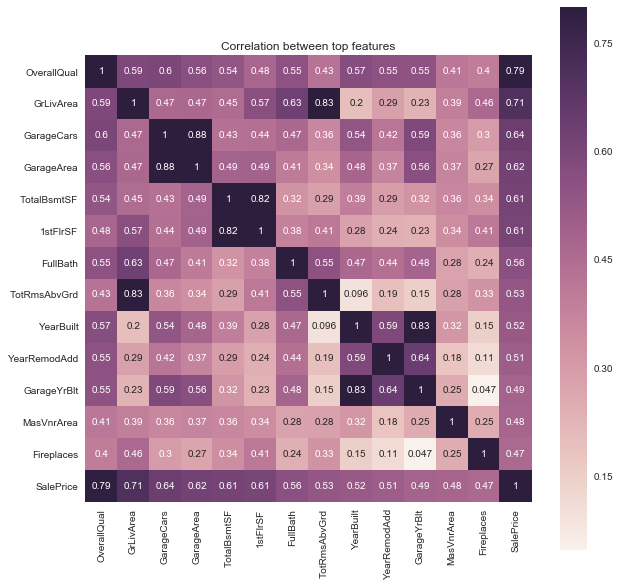

In [9]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
        'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'SalePrice']
corr_zoom = data_train[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_zoom, vmax=0.8, square=True, annot=True)
plt.title("Correlation between top features")

# high correlation between garagecars and garagearea, keep garagecars
# totalbsmtsf and 1stfloorsf, keep totalbsmtsf
# totalrmsabvgrnd and grlivarea, keep grlivarea

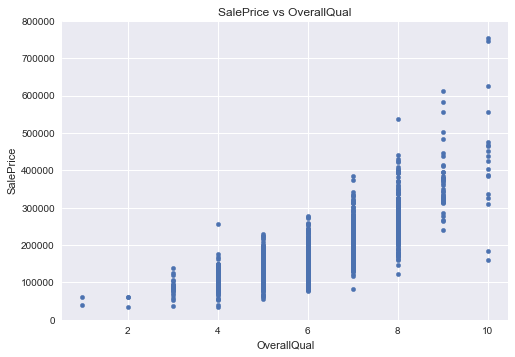

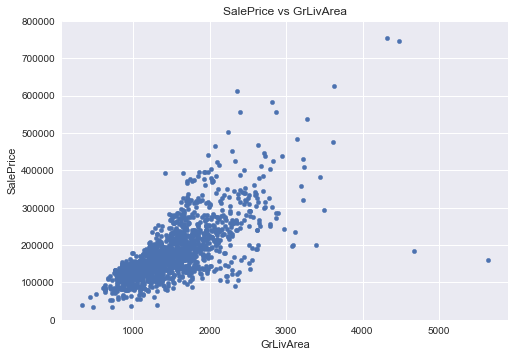

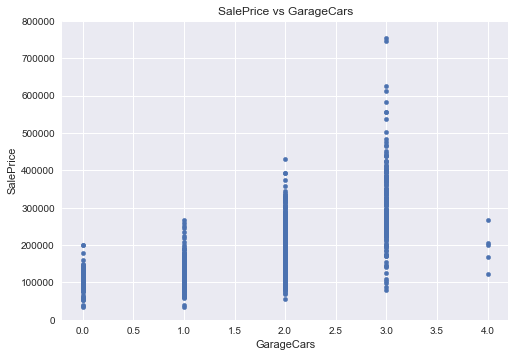

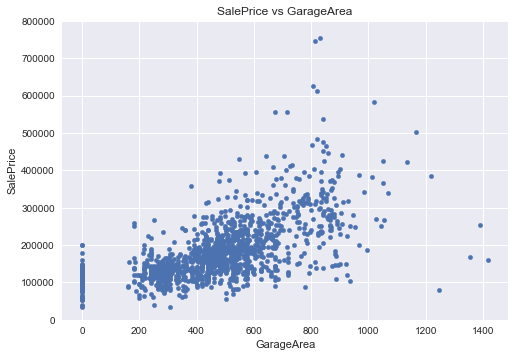

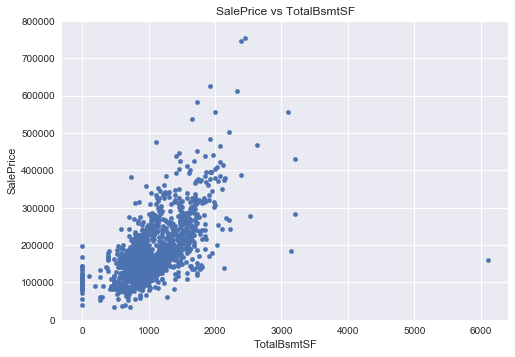

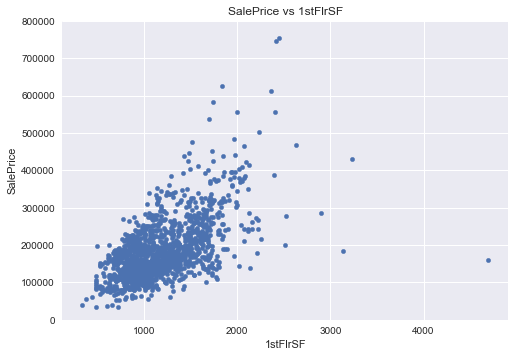

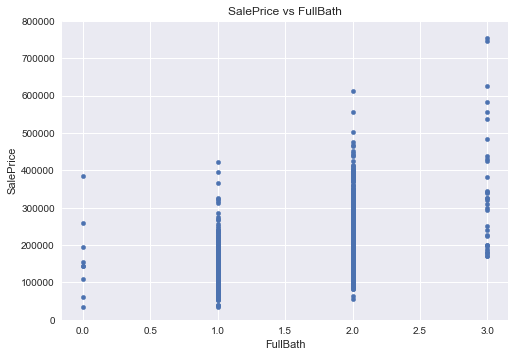

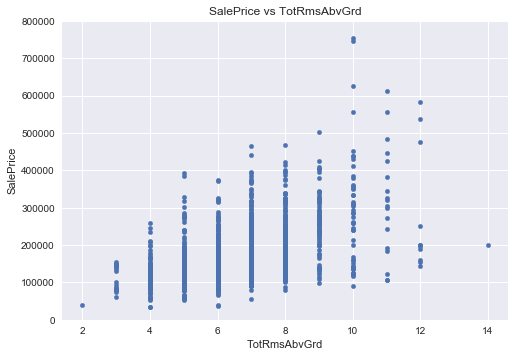

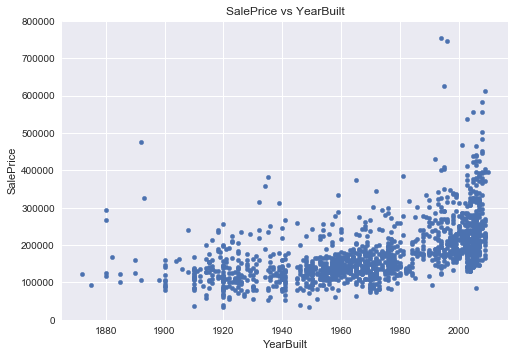

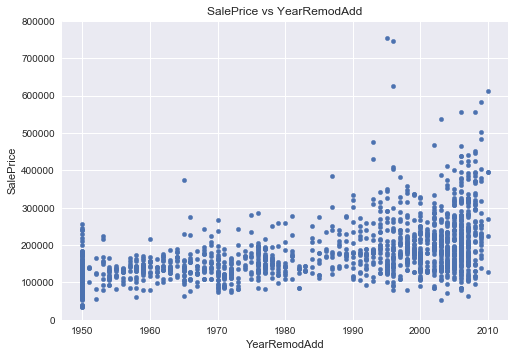

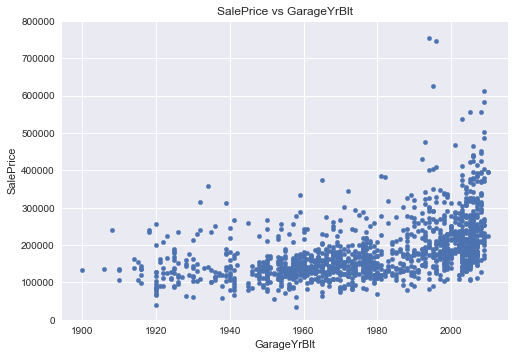

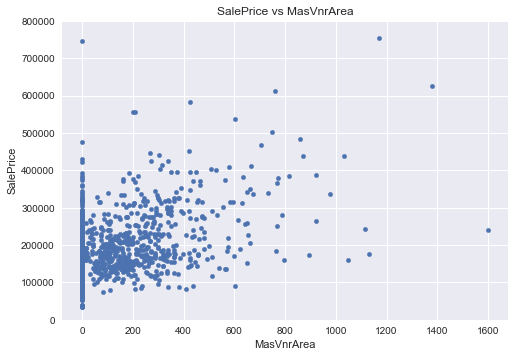

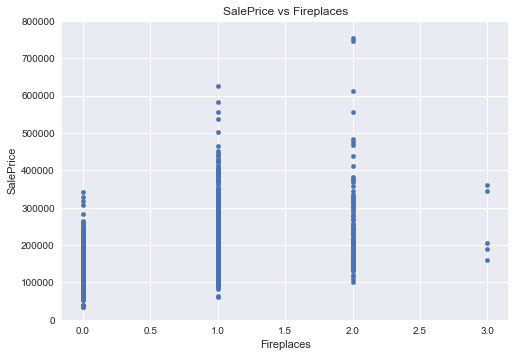

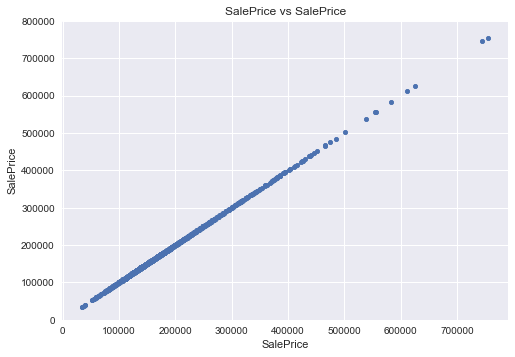

In [15]:
for col in cols:
    data_plot = pd.concat([data_train['SalePrice'], data_train[col]], axis=1)
    data_plot.plot.scatter(x=col, y='SalePrice', ylim=(0, 800000))
    plt.title("SalePrice vs %s" % col)

In [10]:
data_train.sort_values(by='GrLivArea', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


In [11]:
df_all.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
# drop outliers
data_train = data_train.drop(data_train[data_train['Id']==1299].index)
data_train = data_train.drop(data_train[data_train['Id']==523].index)

In [13]:
cat_feat = data_train.select_dtypes(include=['object']).columns.values
print(cat_feat)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


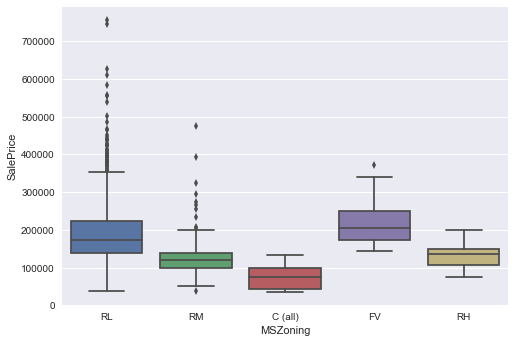

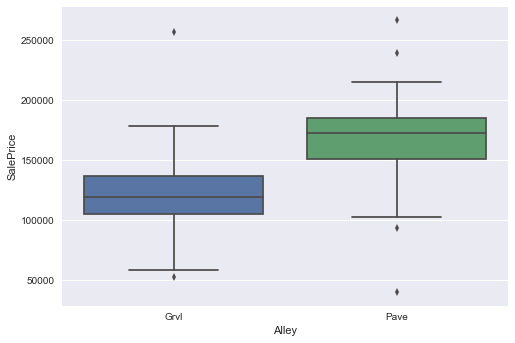

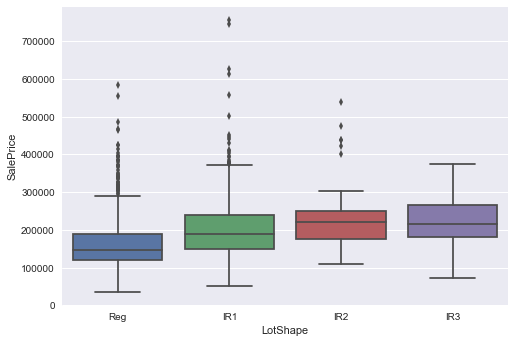

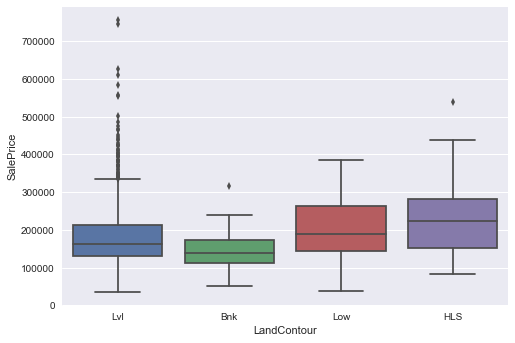

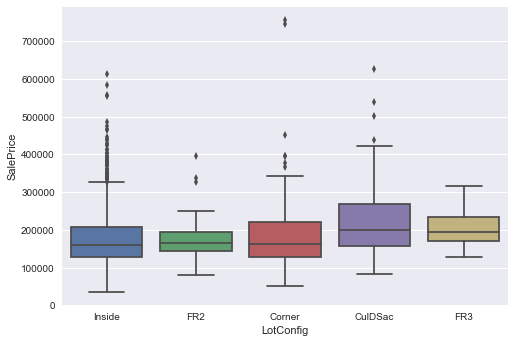

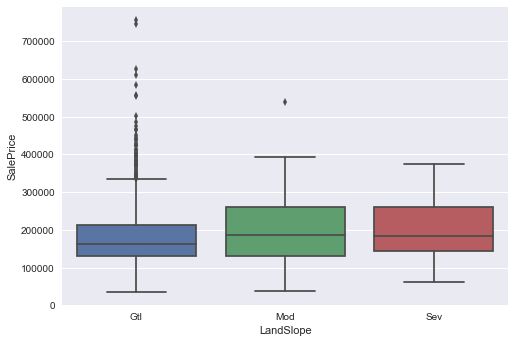

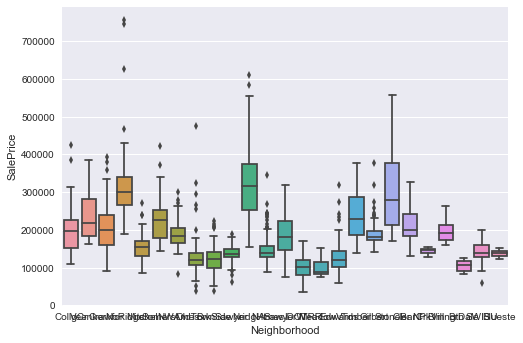

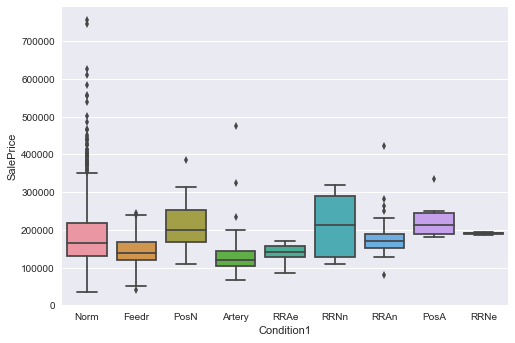

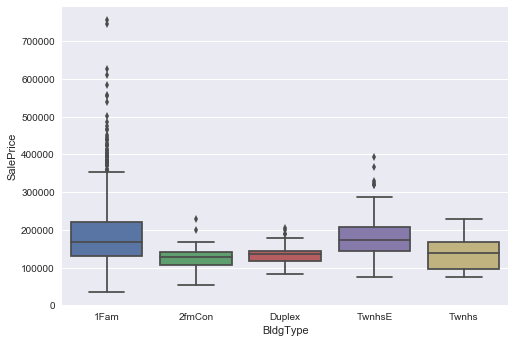

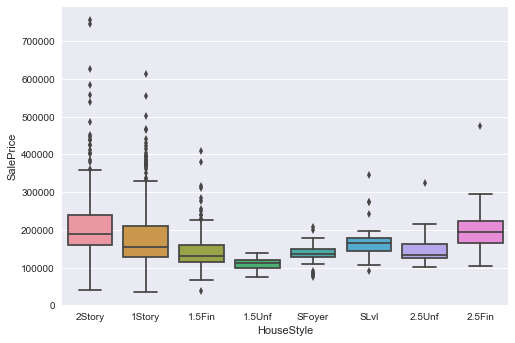

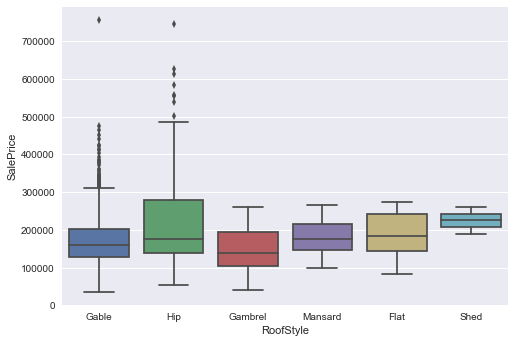

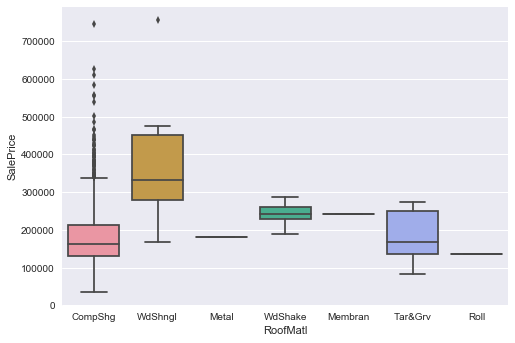

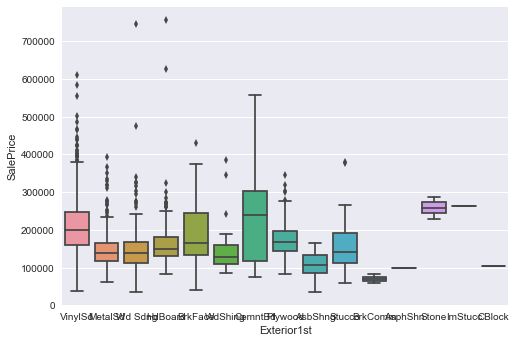

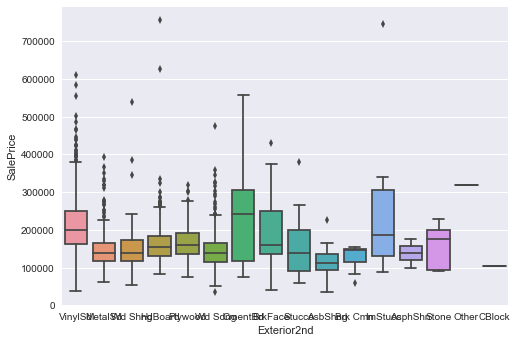

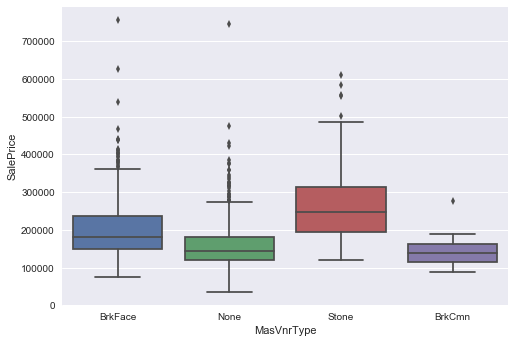

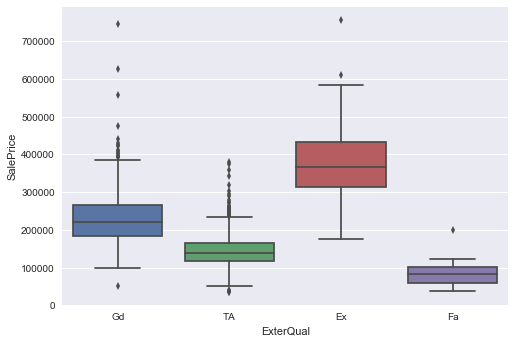

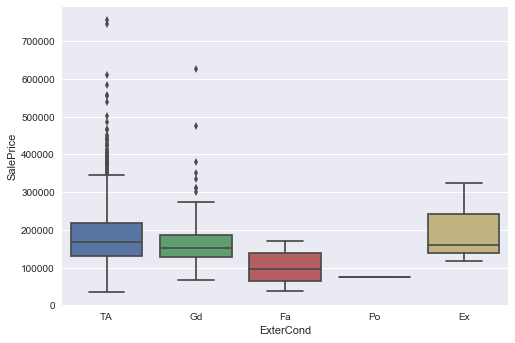

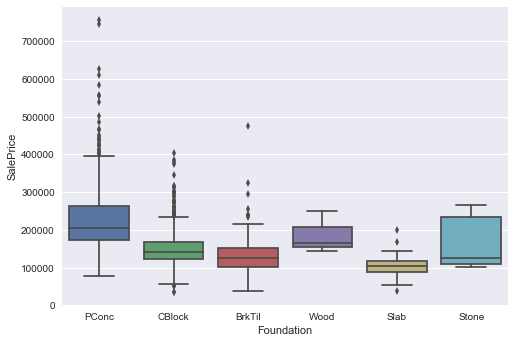

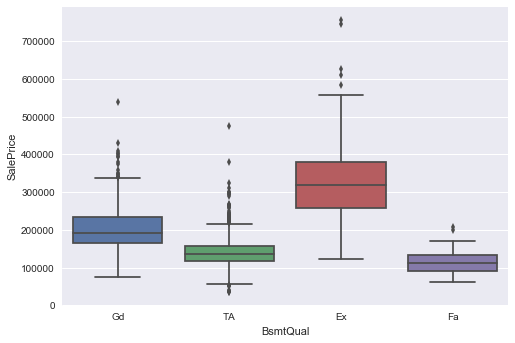

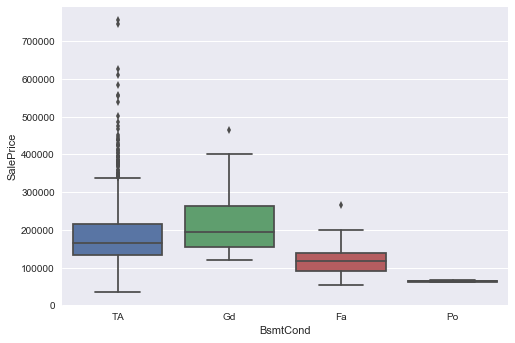

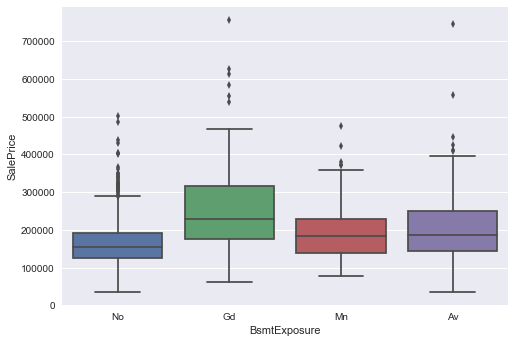

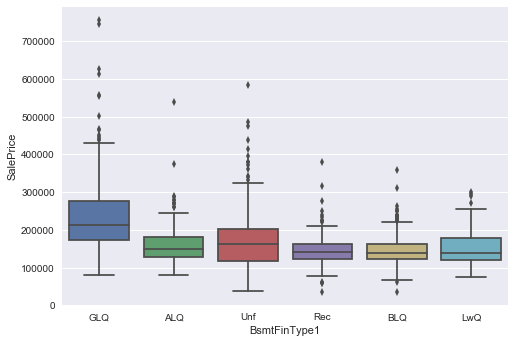

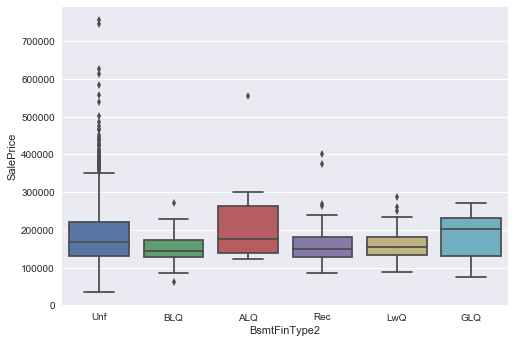

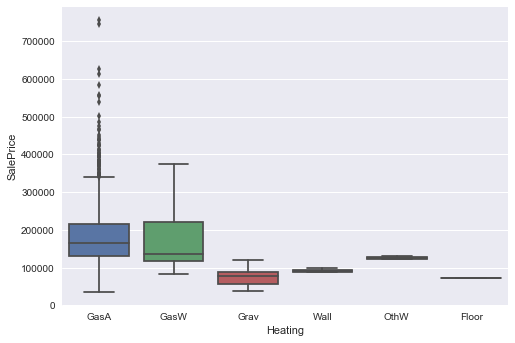

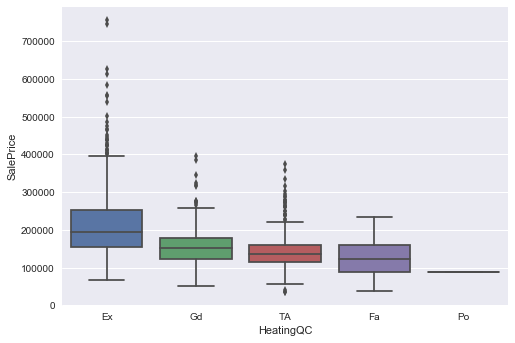

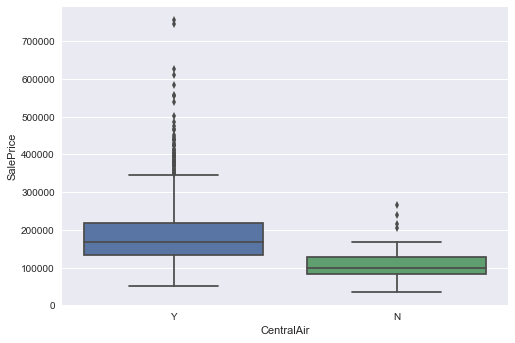

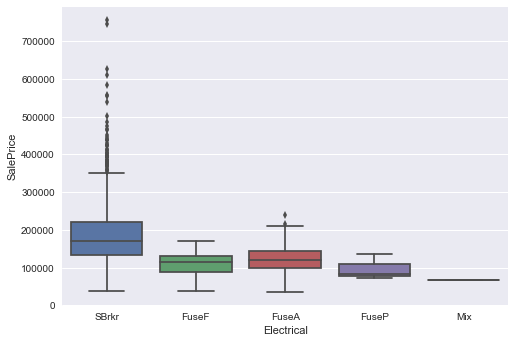

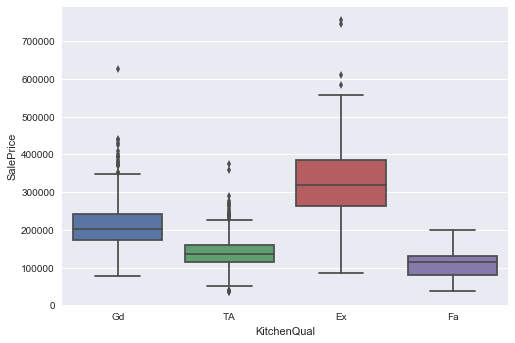

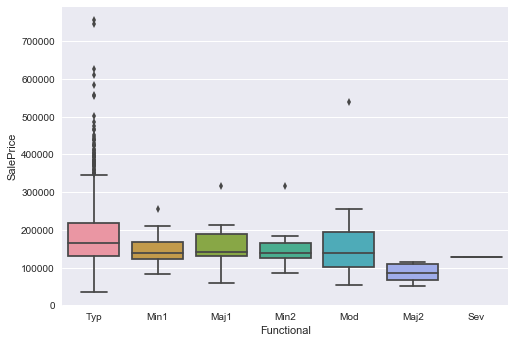

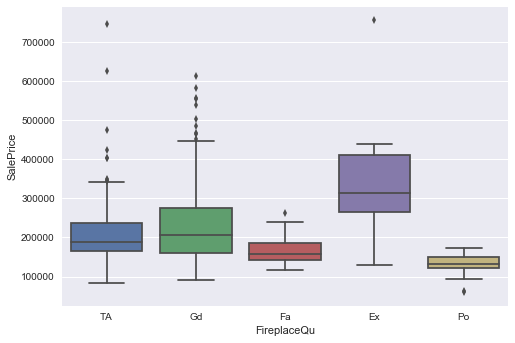

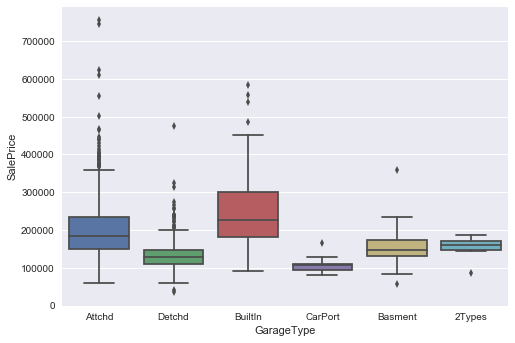

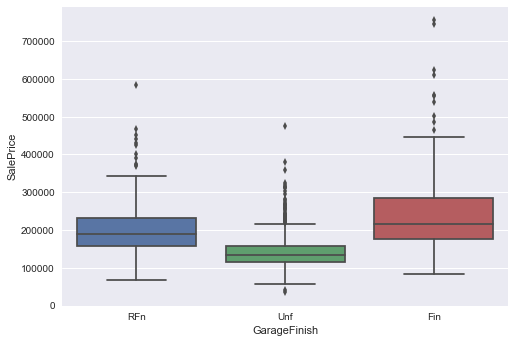

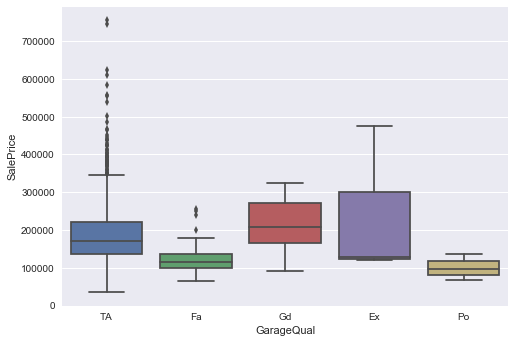

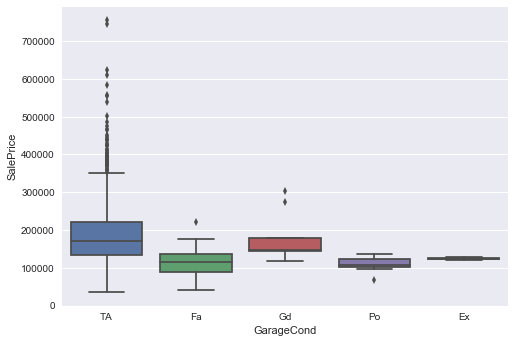

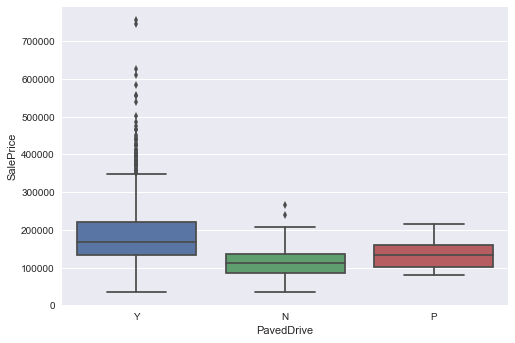

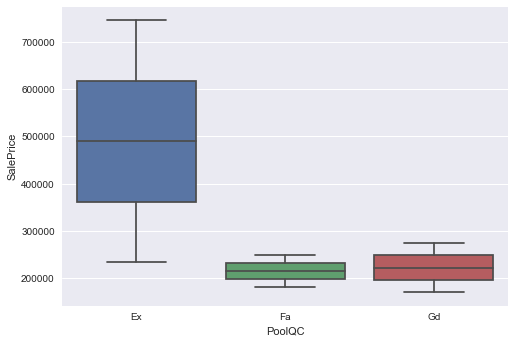

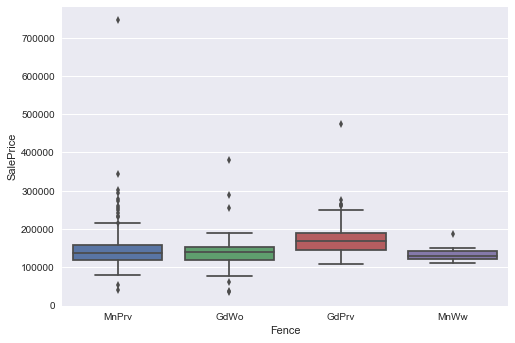

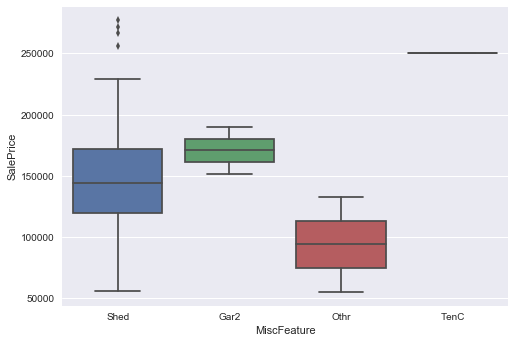

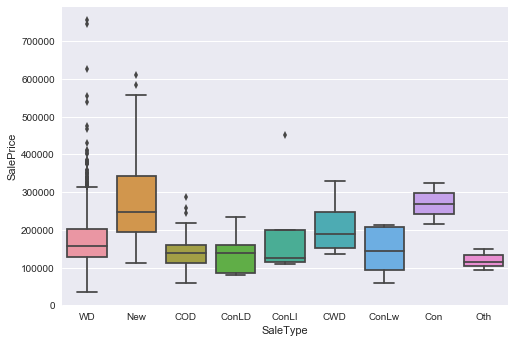

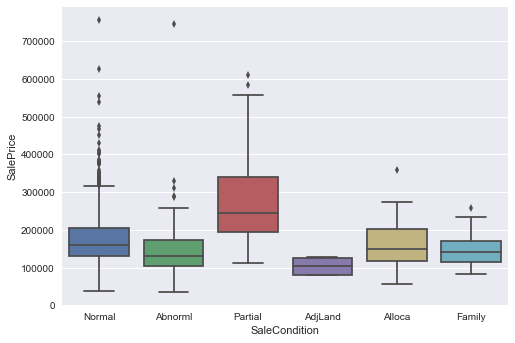

In [14]:
for feat in cat_feat:
    if feat != 'Street' and feat != 'Utilities' and feat != 'Condition2':
        sns.boxplot(x=feat, y='SalePrice', data=data_train)
        plt.show()

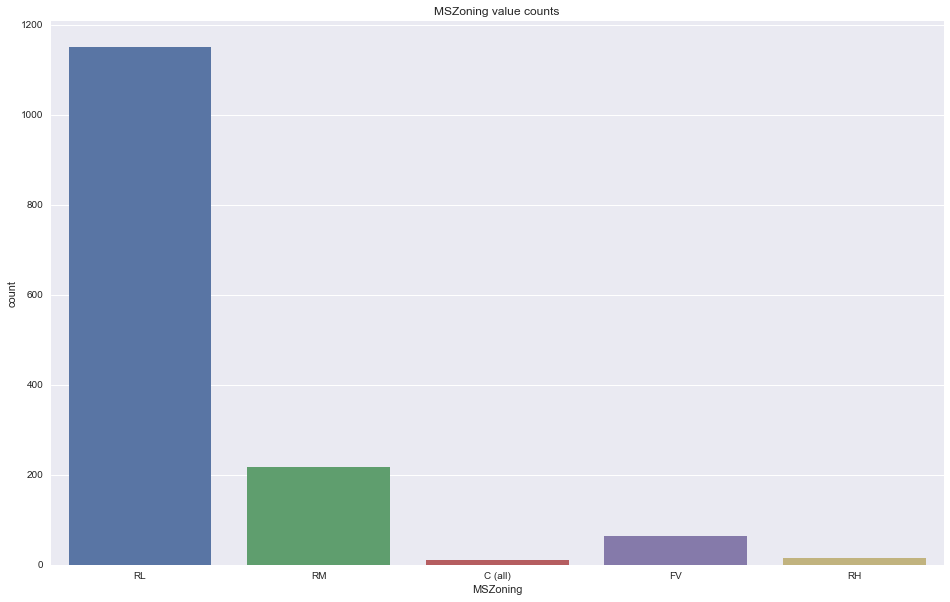

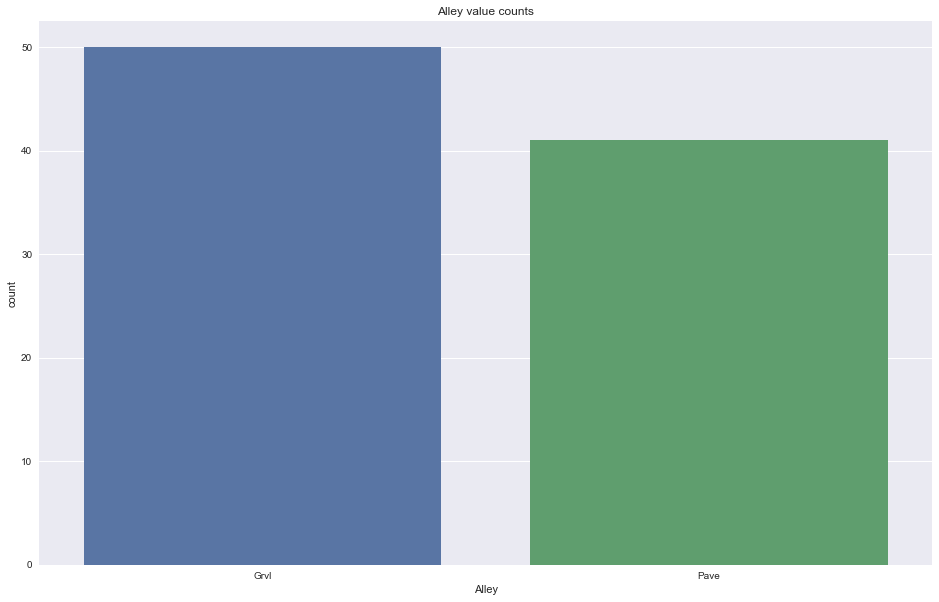

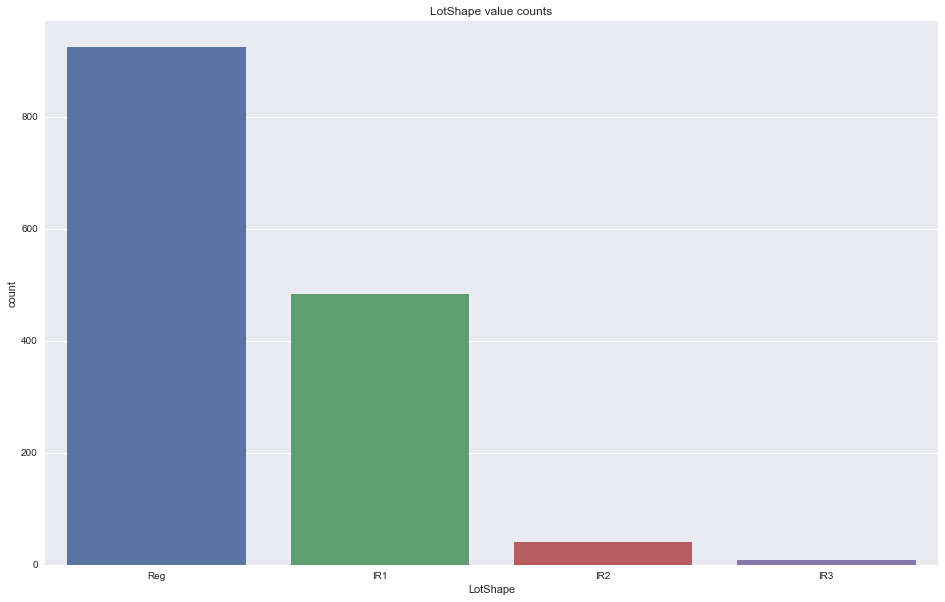

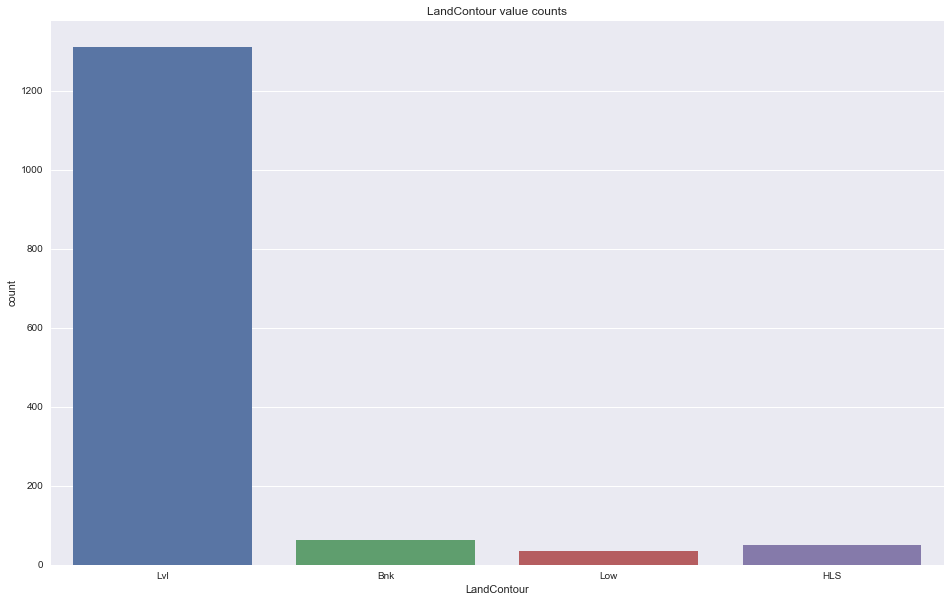

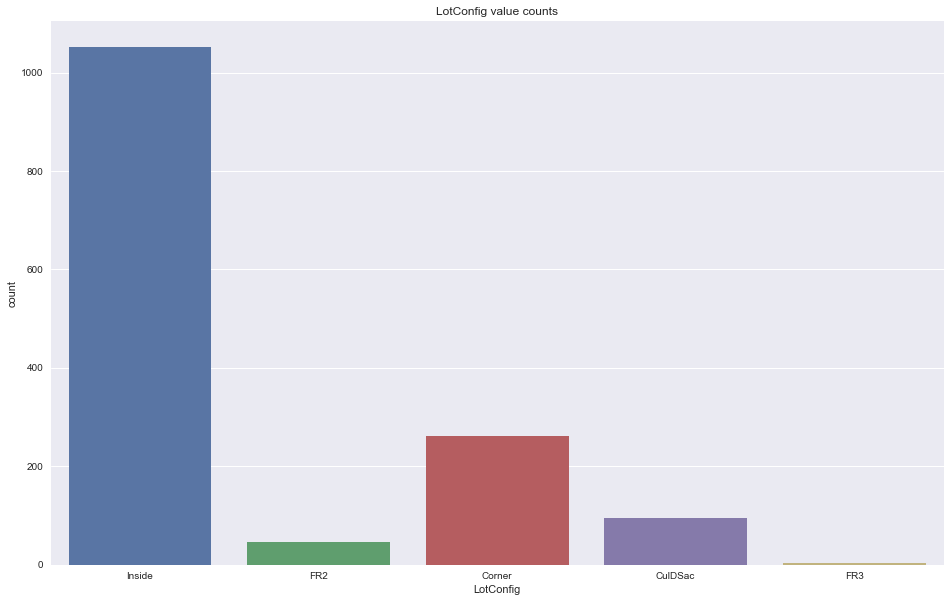

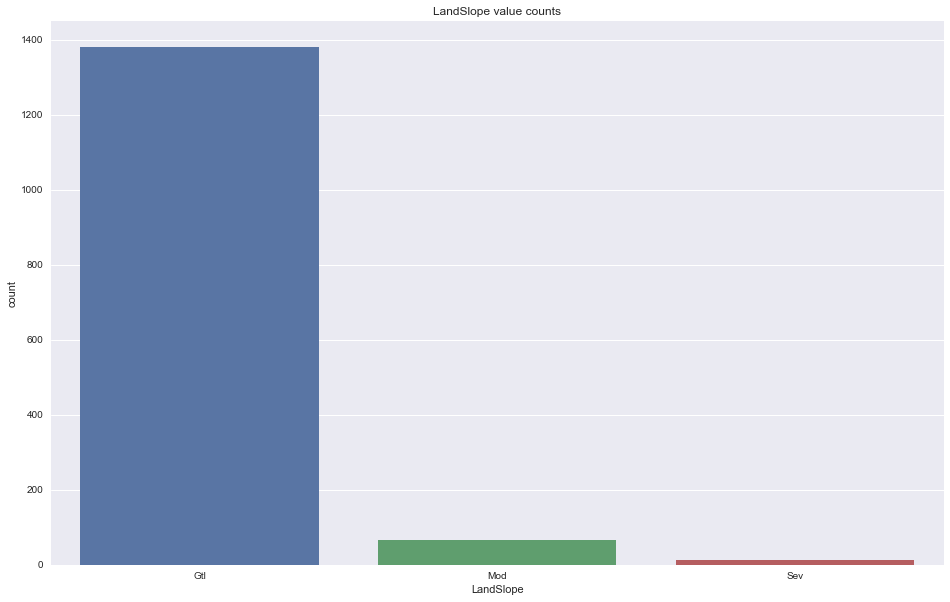

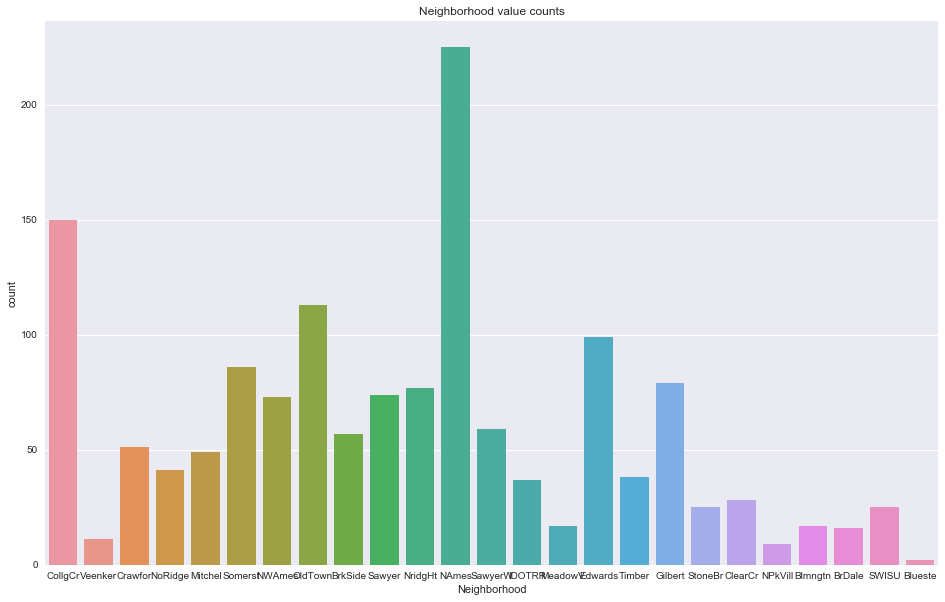

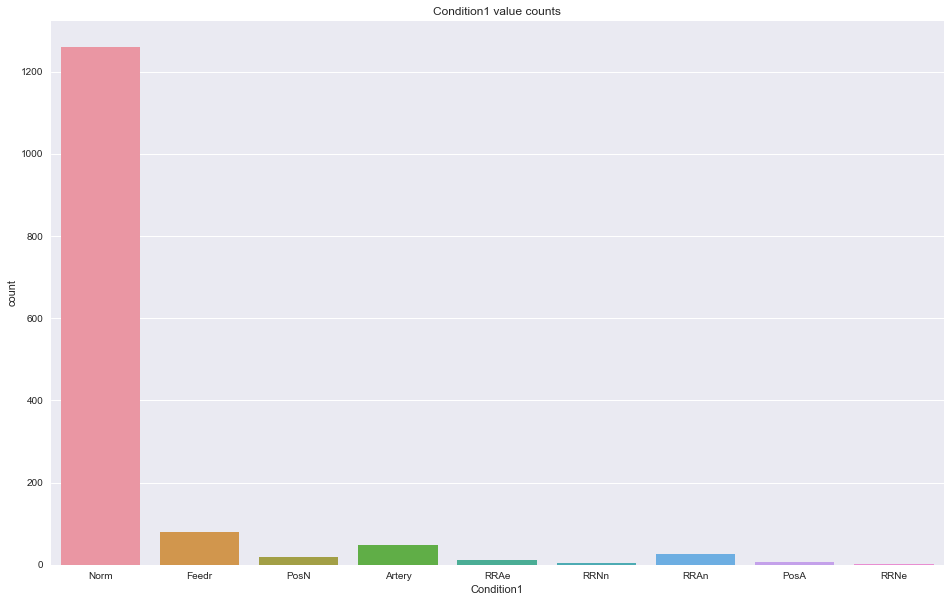

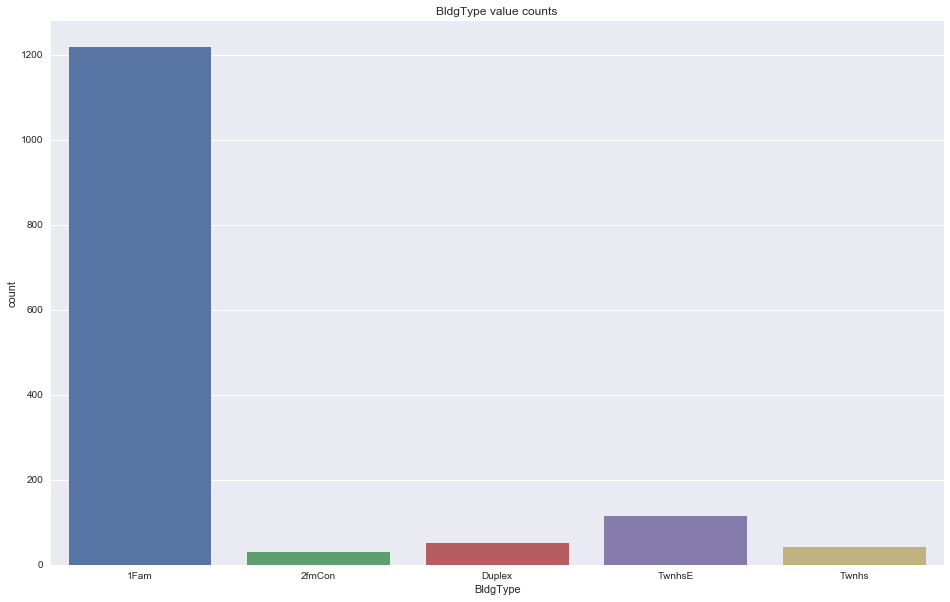

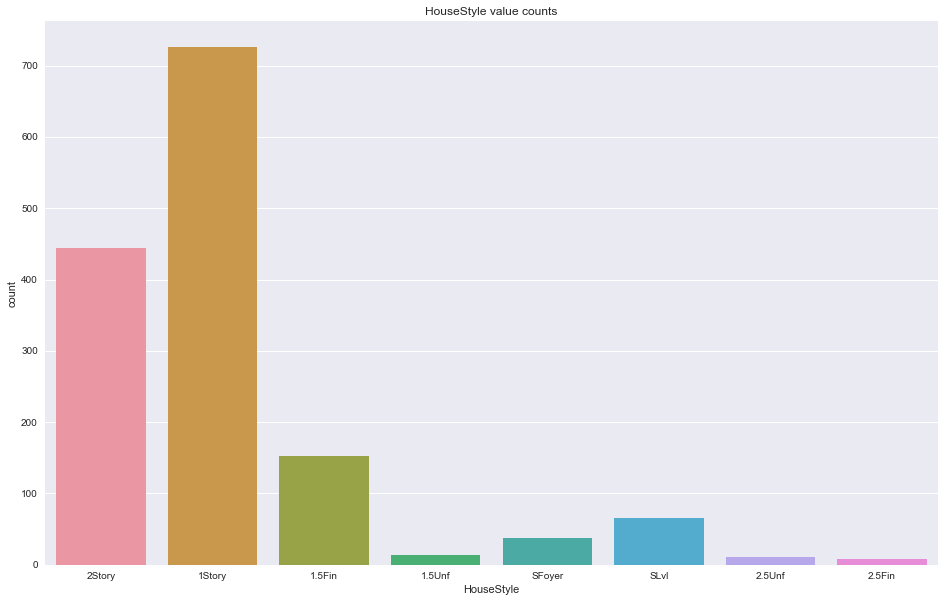

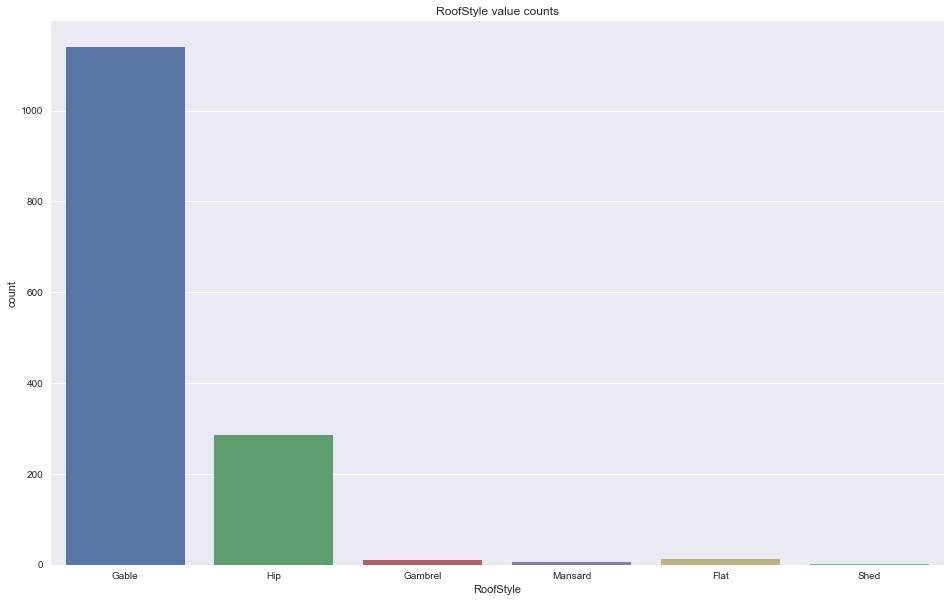

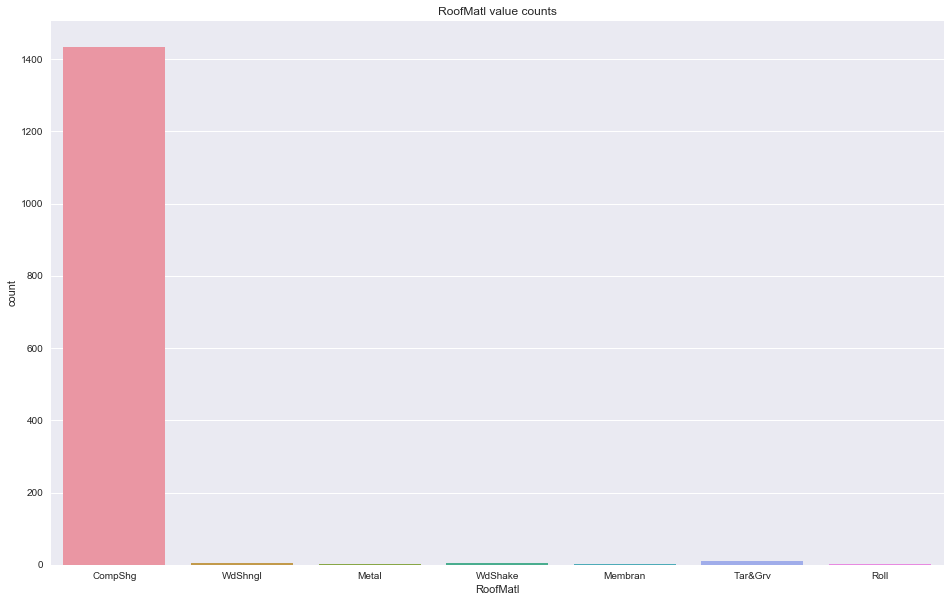

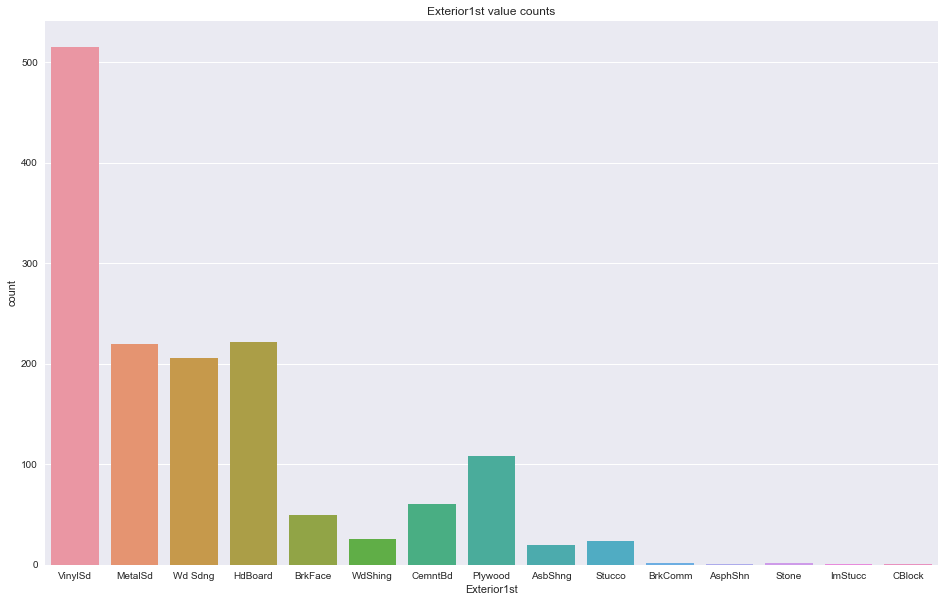

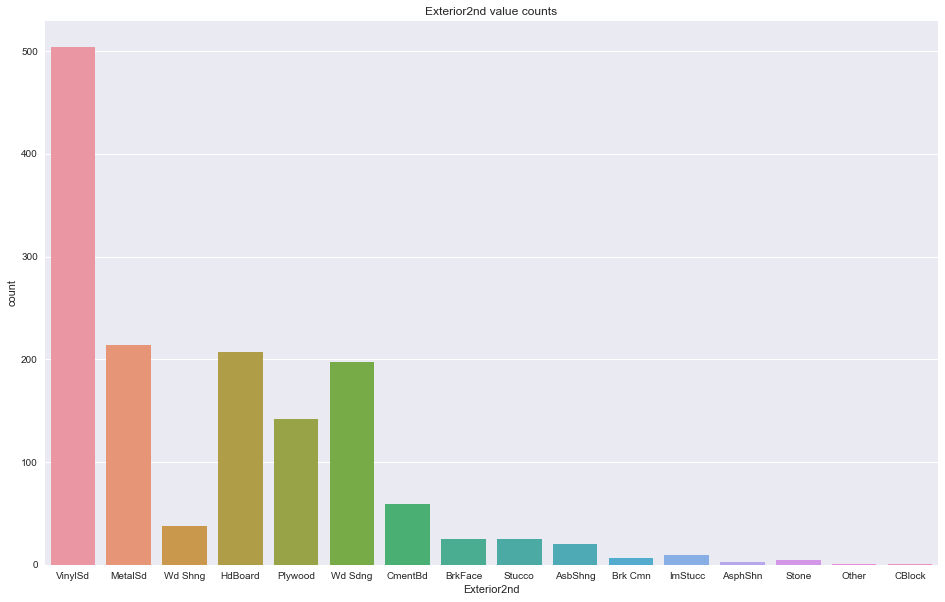

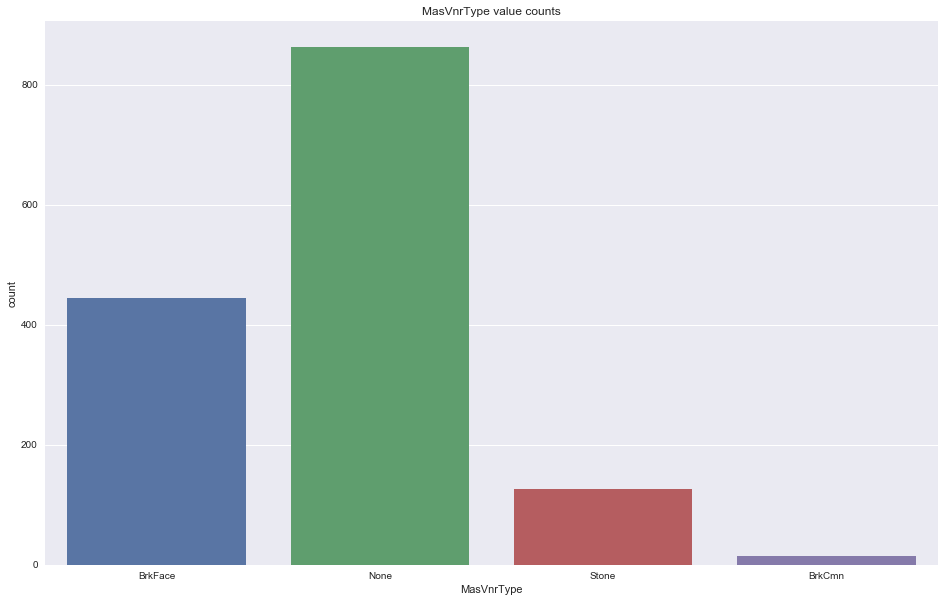

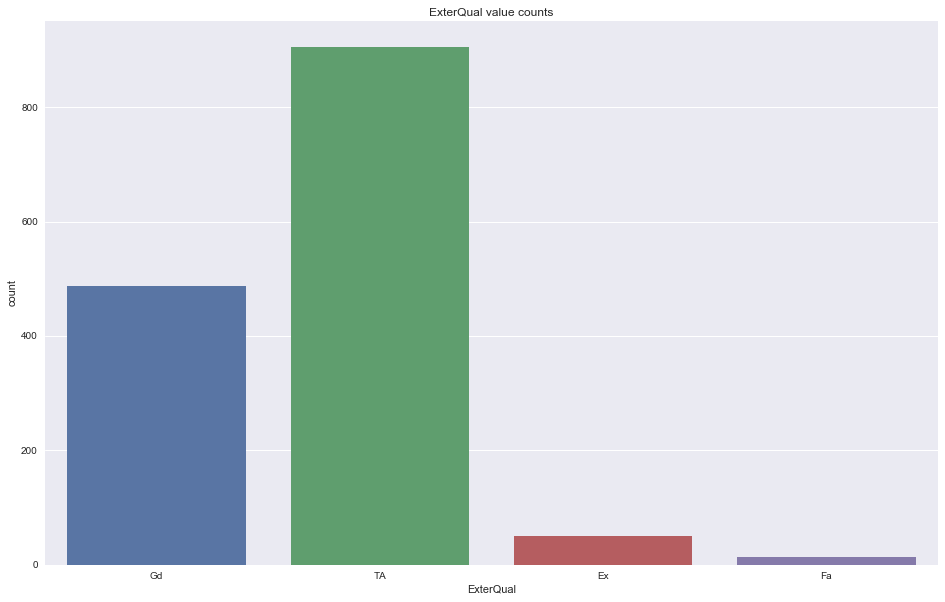

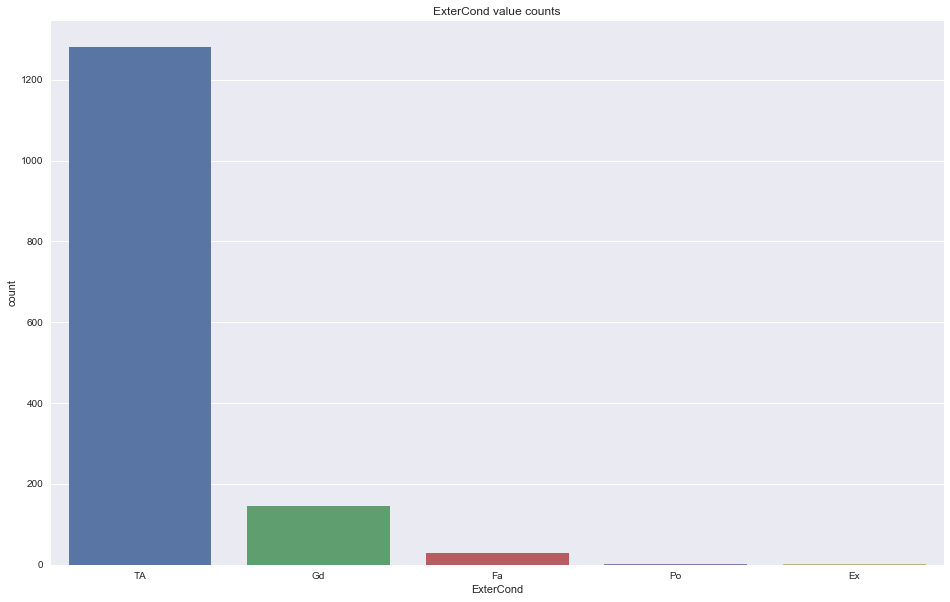

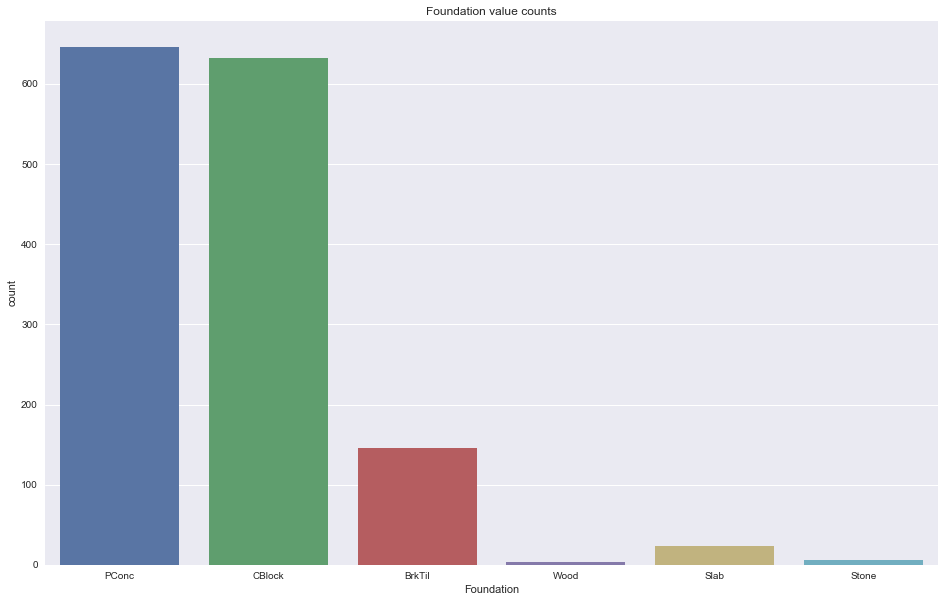

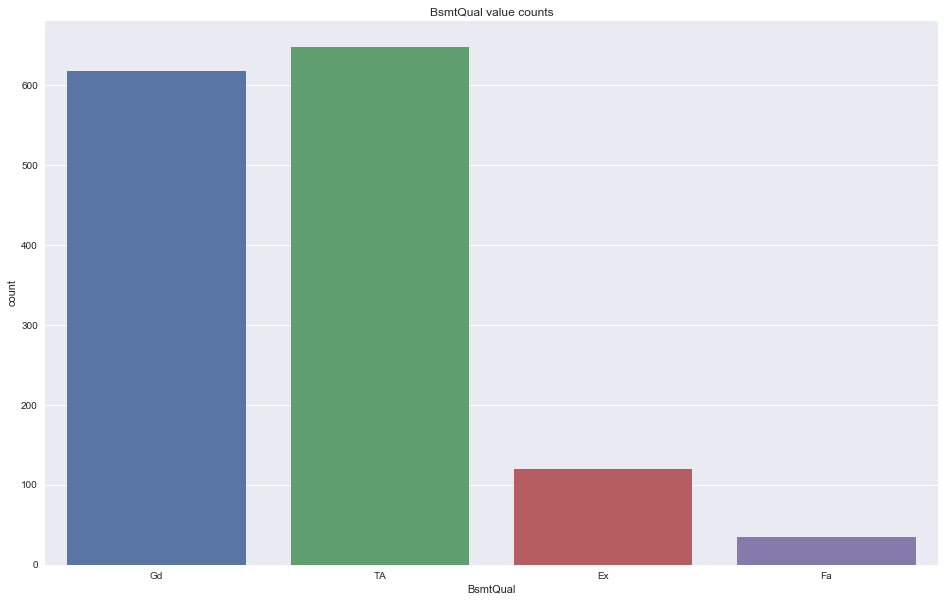

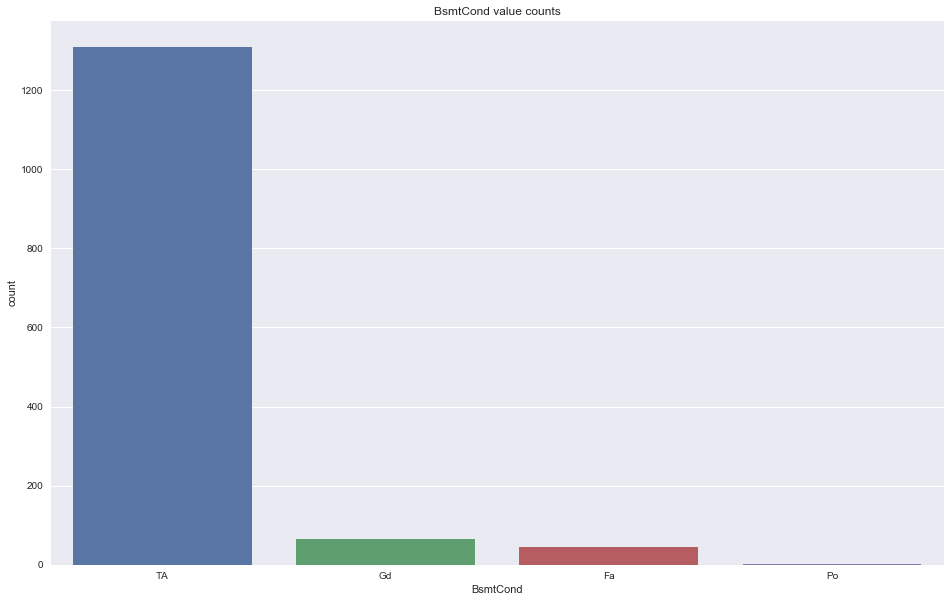

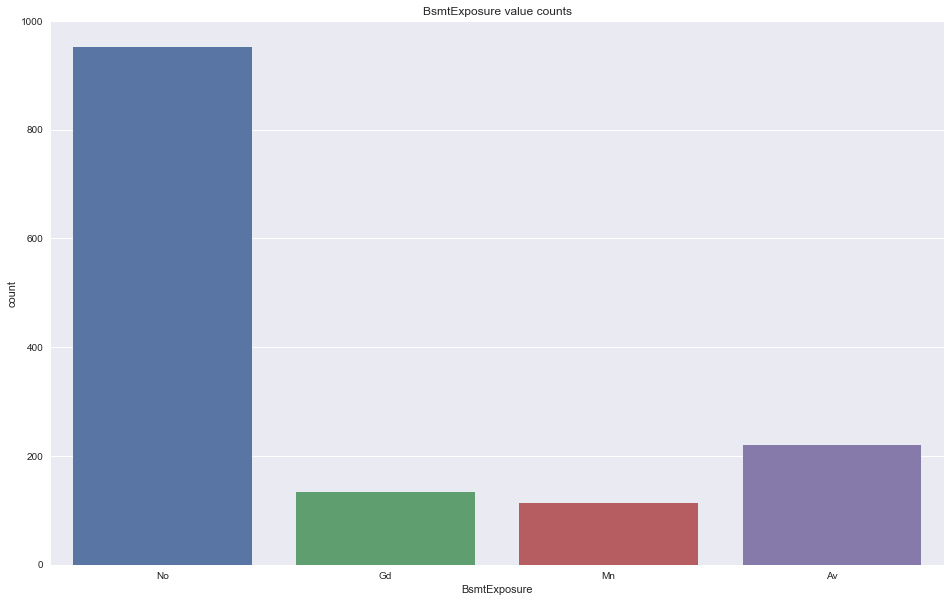

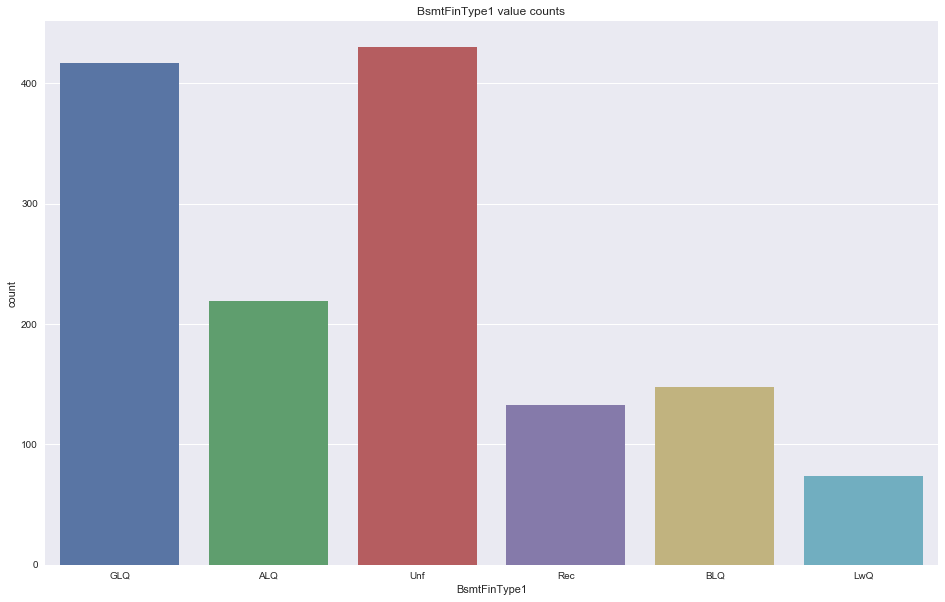

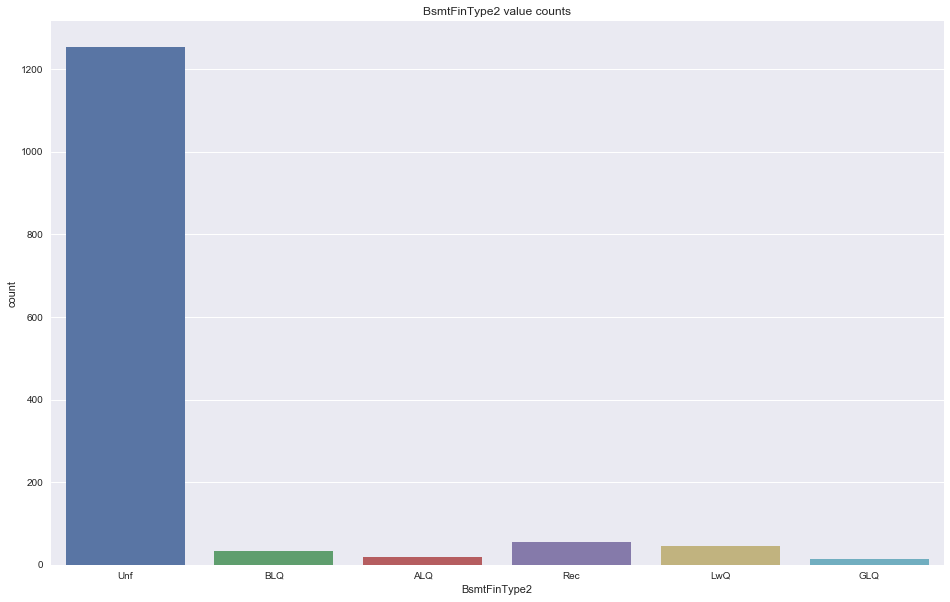

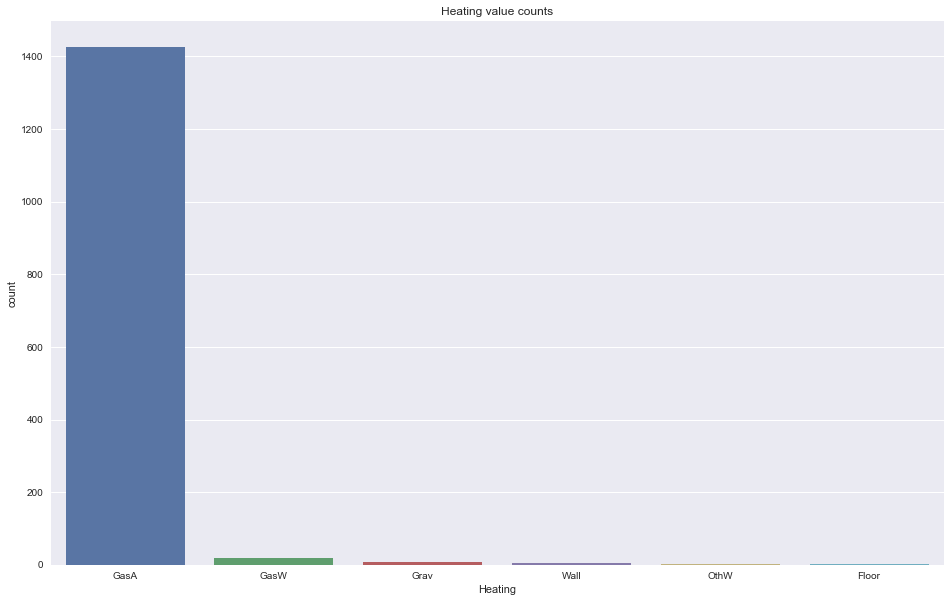

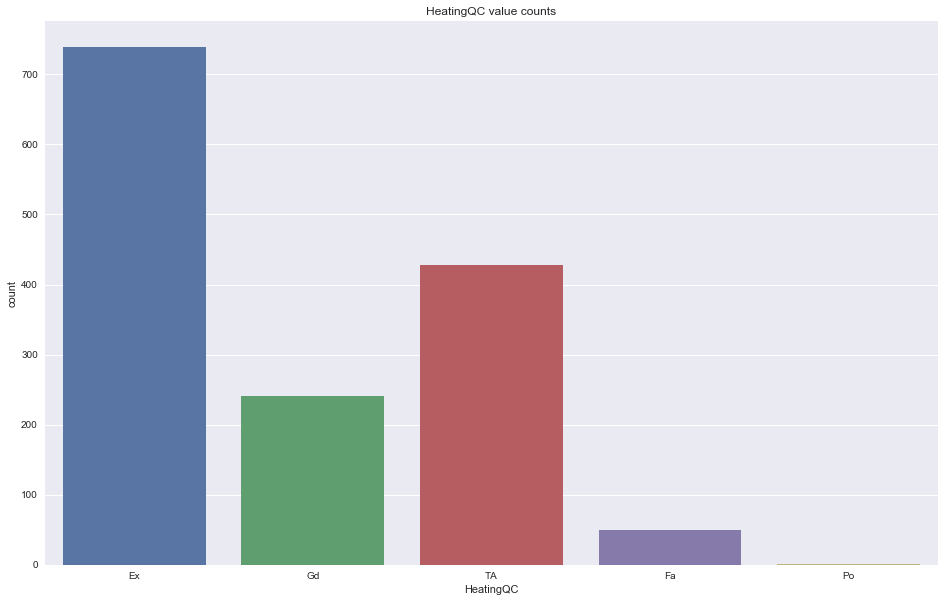

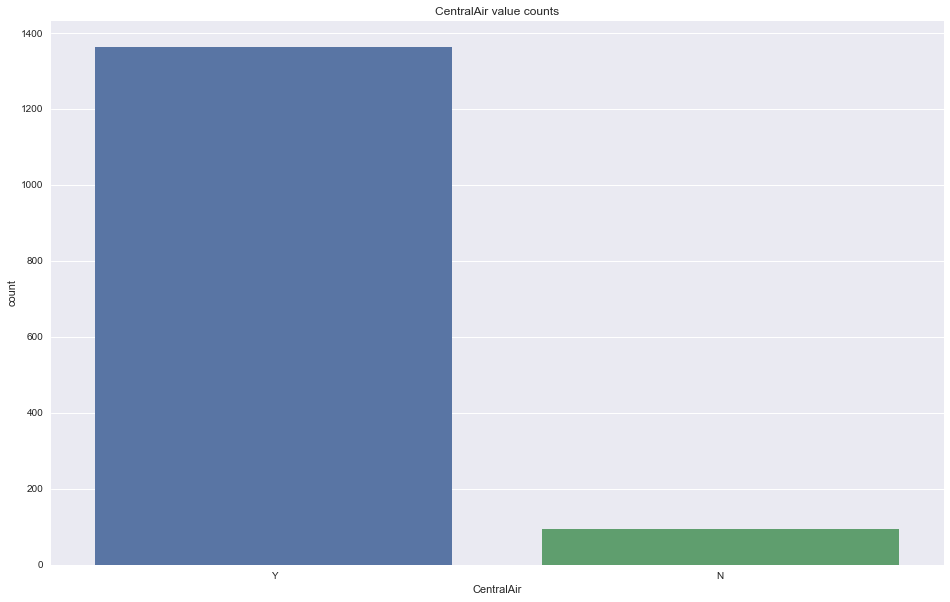

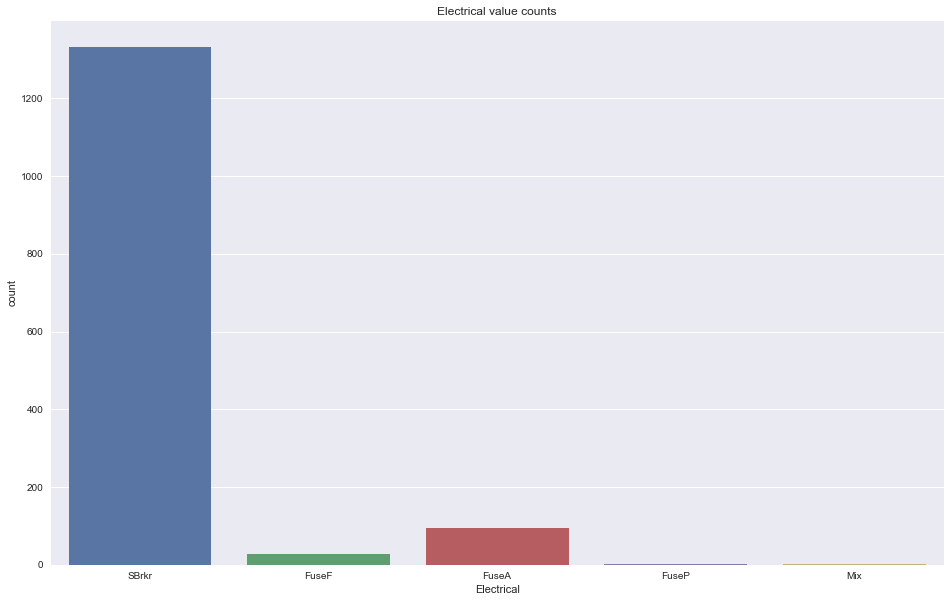

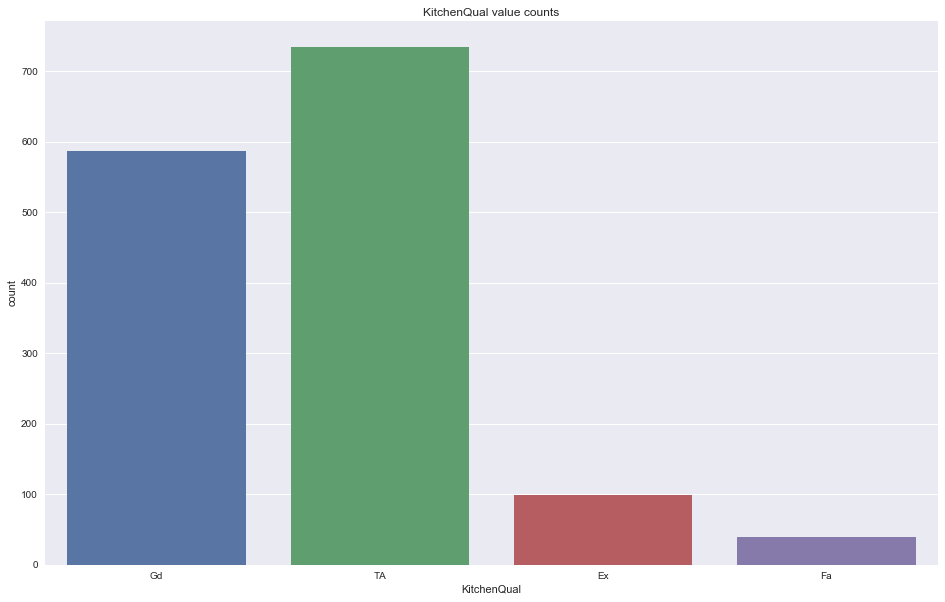

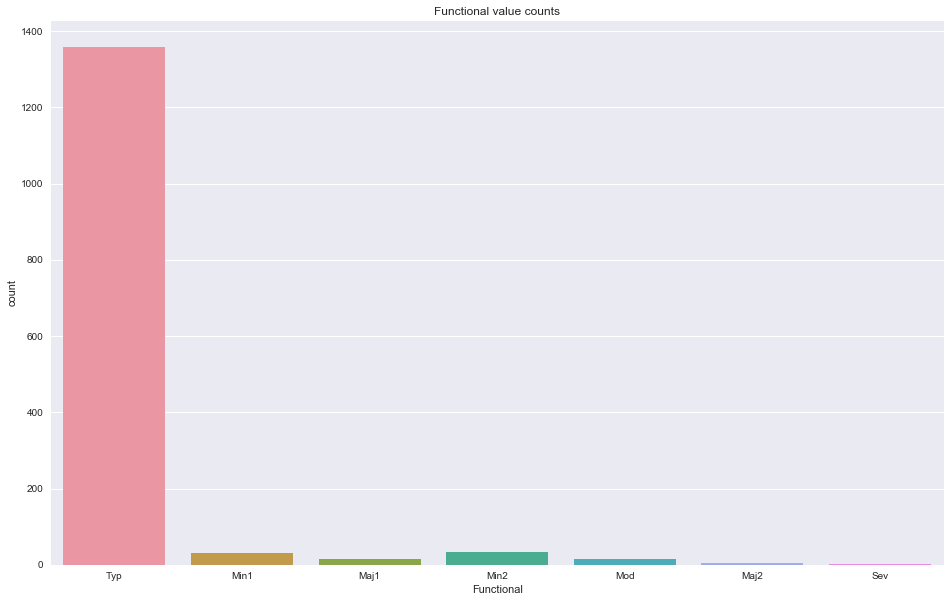

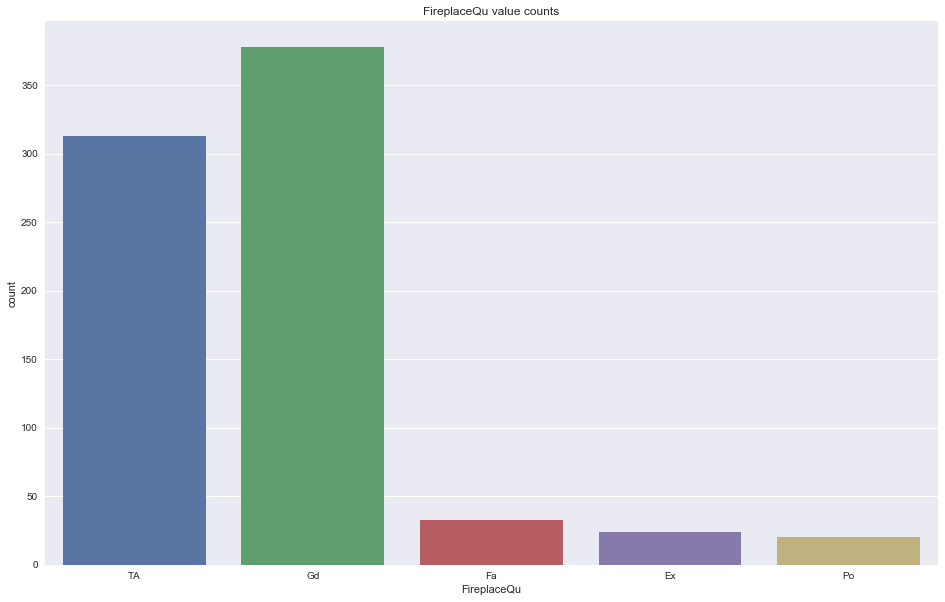

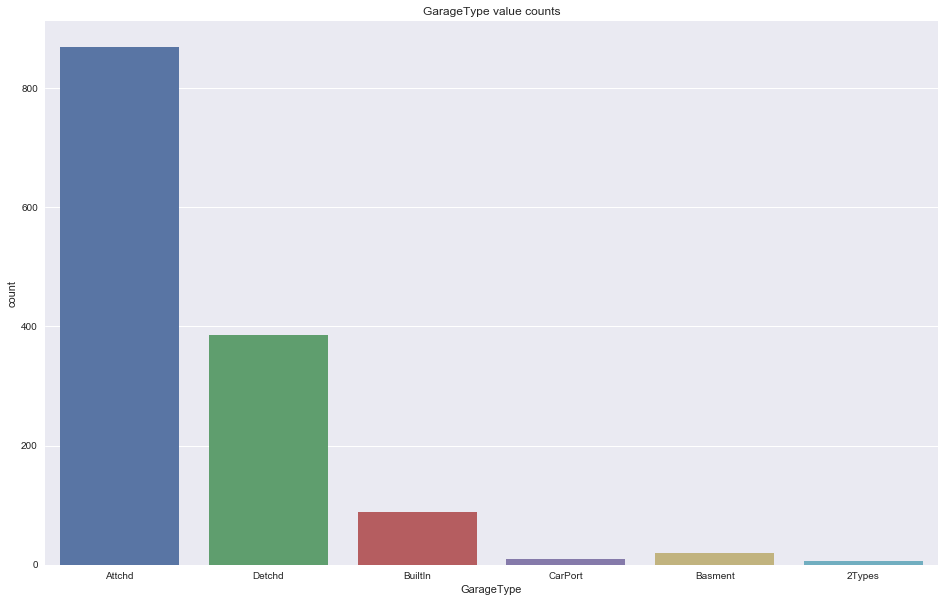

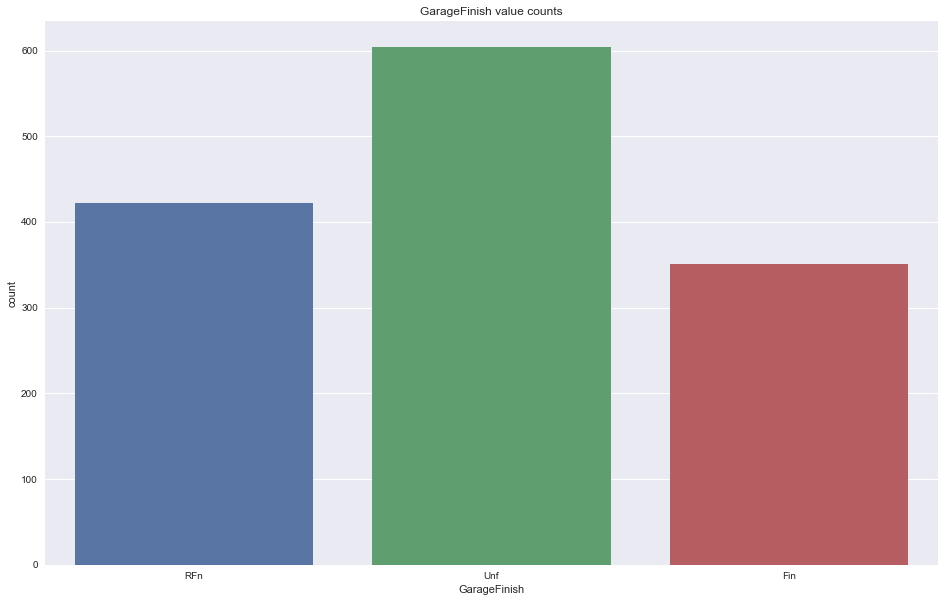

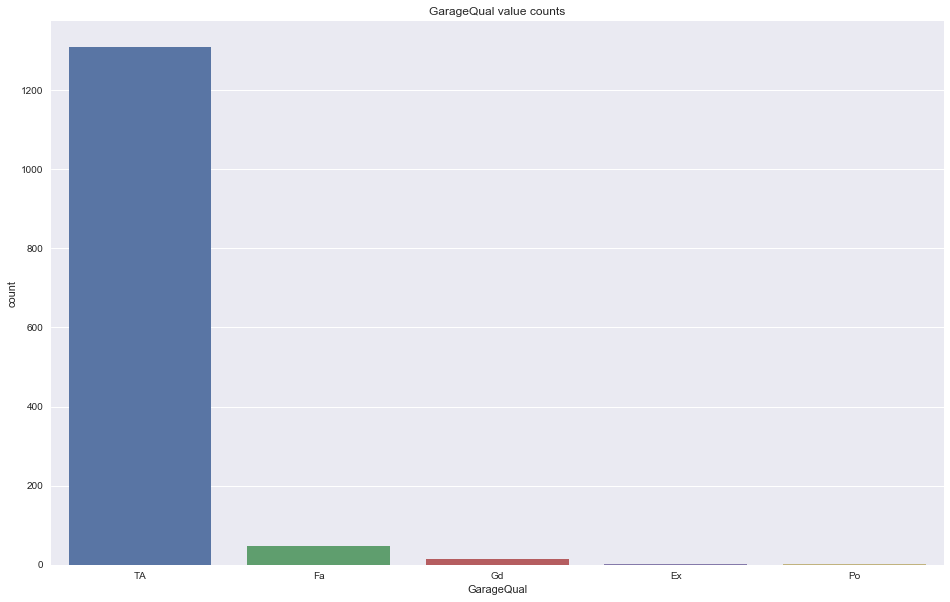

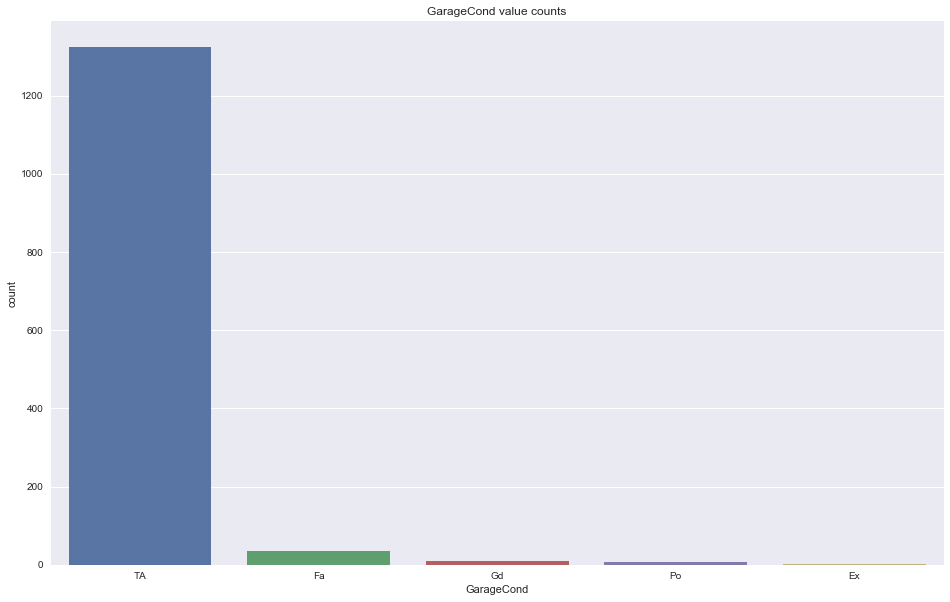

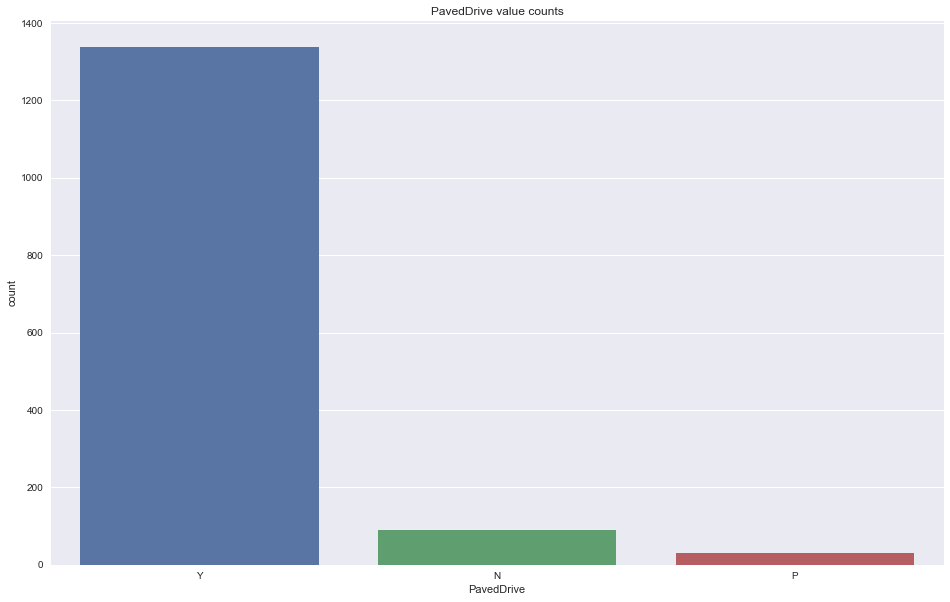

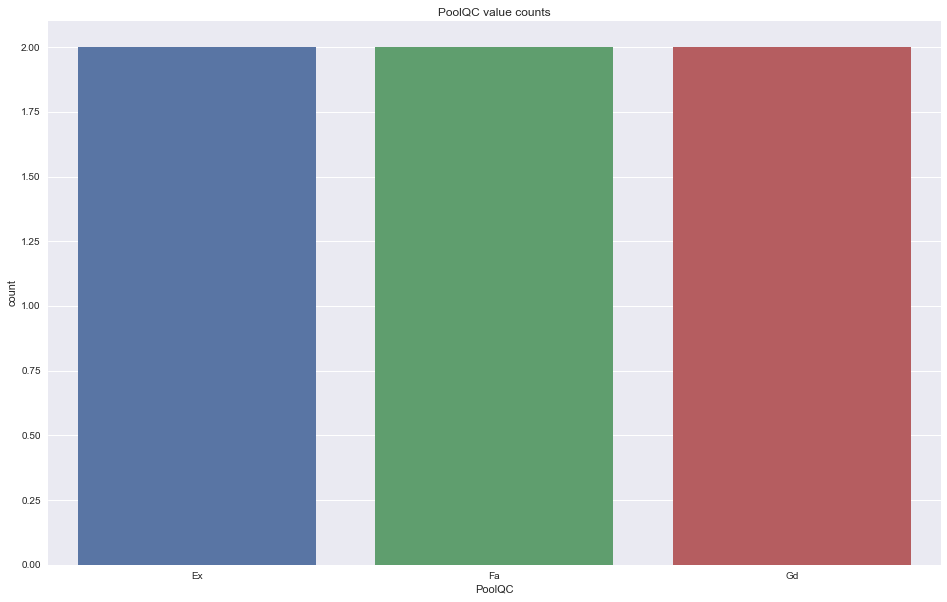

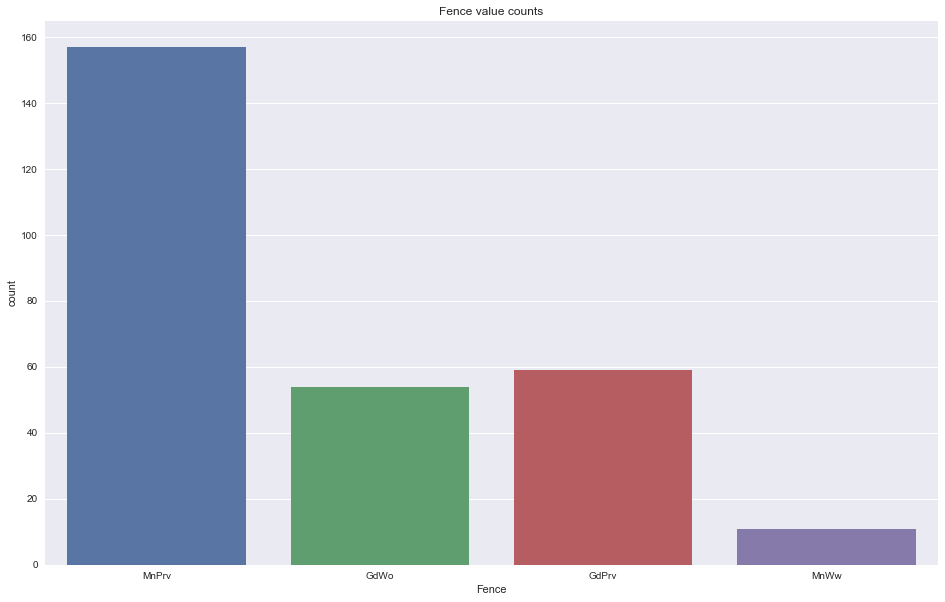

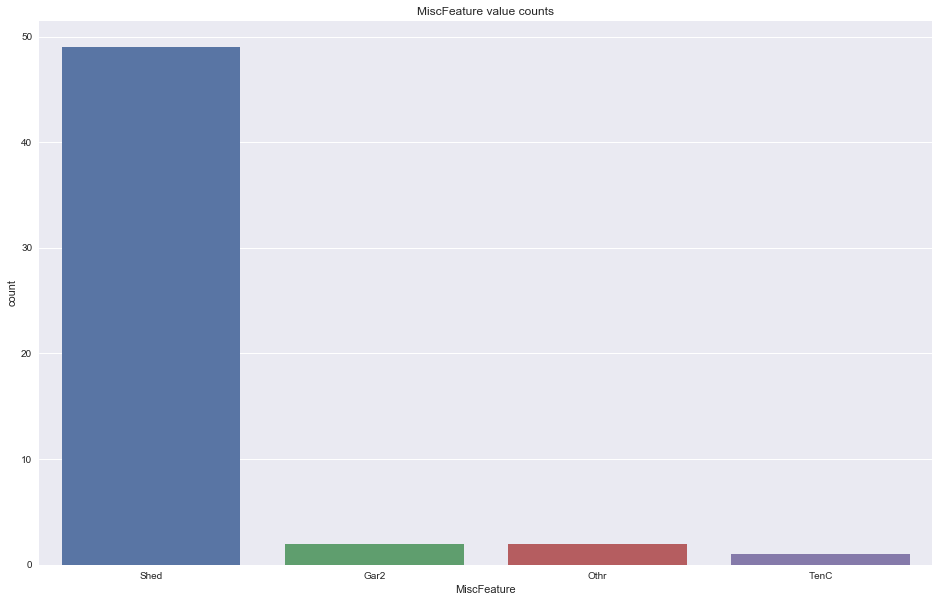

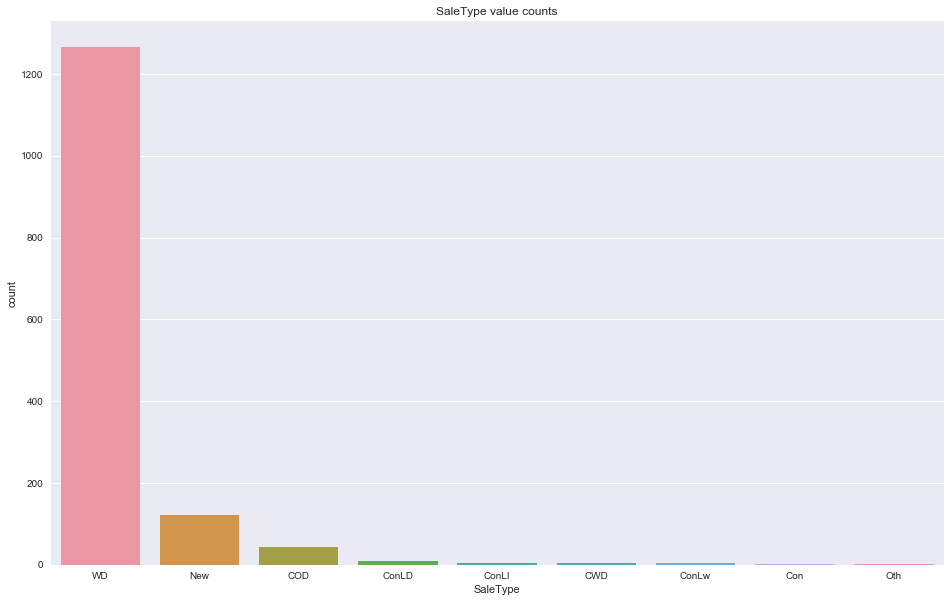

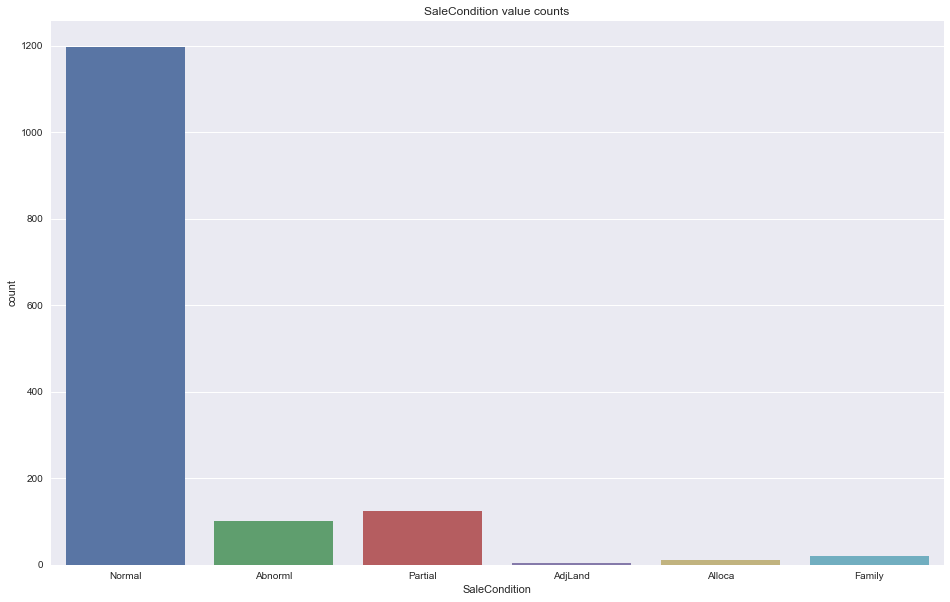

In [15]:
for feat in cat_feat:
    if feat != 'Street' and feat != 'Utilities' and feat != 'Condition2':
        plt.figure(figsize=(16,10))
        sns.countplot(x=feat, data=data_train)
        plt.title("%s value counts" % feat)
        plt.show()

# street
# utilities
# condition2
# roofmatl
# heating
# functional
# garageCond

In [14]:
print(data_train['Street'].value_counts())
print(data_train['Utilities'].value_counts())
print(data_train['Condition2'].value_counts())
print(data_train['RoofMatl'].value_counts())
print(data_train['Heating'].value_counts())
print(data_train['Functional'].value_counts())
print(data_train['GarageCond'].value_counts())

Pave    1452
Grvl       6
Name: Street, dtype: int64
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
Norm      1443
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
CompShg    1433
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64
GasA     1426
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Typ     1358
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
TA    1324
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [15]:
to_remove = ['Street', 'Utilities', 'Condition2']
data_train.drop(to_remove, axis=1, inplace=True)
data_test.drop(to_remove, axis=1, inplace=True)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']

In [16]:
pd.crosstab(data_train.ExterQual,data_train.ExterCond)

ExterCond,Ex,Fa,Gd,Po,TA
ExterQual,,,,,
Ex,1,0,3,0,47
Fa,0,6,0,0,8
Gd,0,0,35,0,453
TA,2,22,107,1,773


**Impute Missing Values**

In [17]:
nans = data_train.isnull().sum()
nans = nans[nans > 0]/1460
print(nans)

# more than 95% missing for PoolQC and MiscFeature

LotFrontage     0.177397
Alley           0.936301
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.994521
Fence           0.806164
MiscFeature     0.961644
dtype: float64


In [18]:
to_remove = ['PoolQC', 'MiscFeature']
data_train.drop(to_remove, axis=1, inplace=True)
data_test.drop(to_remove, axis=1, inplace=True)

In [19]:
nans = data_train.isnull().sum()
nans = nans[nans >0]
print(nans)
nans_t = data_test.isnull().sum()
nans_t = nans_t[nans_t >0]
print(nans_t)

LotFrontage      259
Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1177
dtype: int64
MSZoning           4
LotFrontage      227
Alley           1352
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
Fence           1169
SaleType           1


In [20]:
data_train[data_train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,NaN,IR1,Lvl,Corner,Gtl,...,0,0,0,NaN,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,NaN,IR2,Lvl,Inside,Gtl,...,0,176,0,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,NaN,IR1,Lvl,Corner,Gtl,...,0,0,0,GdWo,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,NaN,IR1,Lvl,CulDSac,Gtl,...,0,0,0,NaN,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,NaN,IR1,Lvl,Inside,Gtl,...,0,0,0,MnPrv,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,NaN,IR1,Lvl,CulDSac,Gtl,...,0,0,0,MnPrv,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,NaN,IR1,Lvl,CulDSac,Gtl,...,0,0,0,MnPrv,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,NaN,IR1,Lvl,CulDSac,Gtl,...,0,0,0,MnPrv,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,NaN,IR2,Lvl,Corner,Gtl,...,0,0,0,NaN,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,NaN,Reg,Lvl,Inside,Gtl,...,0,0,0,GdPrv,0,2,2009,WD,Normal,219500


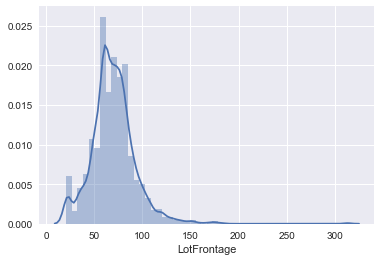

In [21]:
sns.distplot(data_train['LotFrontage'].dropna())
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())

In [17]:
data_train.isnull().sum()[data_train.isnull().sum() > 0]

Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1177
dtype: int64

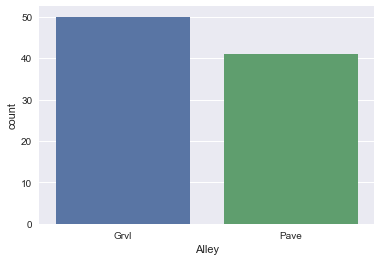

In [22]:
sns.countplot(data_train['Alley'])
data_train['Alley'] = data_train['Alley'].fillna('NA')
data_test['Alley'] = data_test['Alley'].fillna('NA')

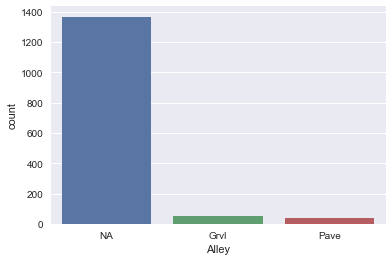

In [23]:
sns.countplot(data_train['Alley'])

In [24]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1177
dtype: int64
MSZoning           4
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
Fence           1169
SaleType           1
dtype: int64


     FireplaceQu  Fireplaces
0            NaN           0
5            NaN           0
10           NaN           0
12           NaN           0
15           NaN           0
17           NaN           0
18           NaN           0
19           NaN           0
26           NaN           0
29           NaN           0
30           NaN           0
31           NaN           0
32           NaN           0
36           NaN           0
38           NaN           0
39           NaN           0
42           NaN           0
43           NaN           0
44           NaN           0
47           NaN           0
48           NaN           0
49           NaN           0
50           NaN           0
52           NaN           0
56           NaN           0
57           NaN           0
59           NaN           0
60           NaN           0
61           NaN           0
63           NaN           0
...          ...         ...
1391         NaN           0
1397         NaN           0
1398         N

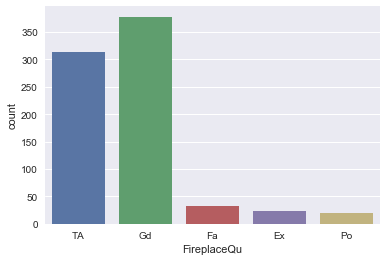

In [25]:
sns.countplot(data_train['FireplaceQu'])
fp = data_train[data_train['FireplaceQu'].isnull()]
print(fp[['FireplaceQu', 'Fireplaces']])

In [26]:
data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna('NA')
data_test['FireplaceQu'] = data_test['FireplaceQu'].fillna('NA')

In [27]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1177
dtype: int64
MSZoning           4
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
Fence           1169
SaleType           1
dtype: int64


Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Alley',
       u'LotShape', u'LandContour', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'BldgType', u'HouseStyle',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation',
       u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
       u'GarageQ

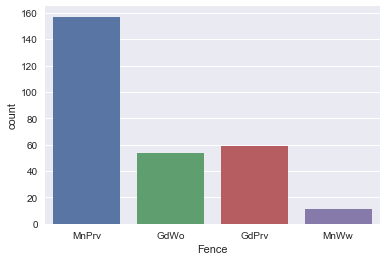

In [28]:
sns.countplot(data_train['Fence'].dropna())
print(data_train.columns)

In [29]:
data_train['Fence'] = data_train['Fence'].fillna('NA')
data_test['Fence'] = data_test['Fence'].fillna('NA')

In [30]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
MSZoning         4
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64


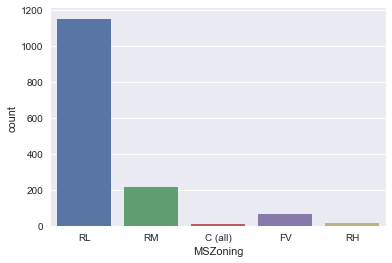

In [31]:
sns.countplot(data_train['MSZoning'])
def impute_mode(df, col, mode):
    return df[col].fillna(mode)

In [32]:
data_train['MSZoning'] = impute_mode(data_train, 'MSZoning', 'RL')

In [33]:
data_test['MSZoning'] = impute_mode(data_test, 'MSZoning', 'RL')

In [34]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64


In [35]:
garage_df = data_test[data_test['GarageType'].isnull()][['GarageType', 'GarageCars']]
print(garage_df)

     GarageType  GarageCars
53          NaN         0.0
71          NaN         0.0
79          NaN         0.0
92          NaN         0.0
96          NaN         0.0
98          NaN         0.0
100         NaN         0.0
130         NaN         0.0
133         NaN         0.0
134         NaN         0.0
154         NaN         0.0
155         NaN         0.0
257         NaN         0.0
261         NaN         0.0
327         NaN         0.0
348         NaN         0.0
350         NaN         0.0
351         NaN         0.0
359         NaN         0.0
362         NaN         0.0
371         NaN         0.0
374         NaN         0.0
376         NaN         0.0
379         NaN         0.0
387         NaN         0.0
433         NaN         0.0
550         NaN         0.0
621         NaN         0.0
630         NaN         0.0
633         NaN         0.0
...         ...         ...
938         NaN         0.0
939         NaN         0.0
962         NaN         0.0
966         NaN     

In [36]:
type(data_train['GarageYrBlt'][0])

numpy.float64

In [37]:
col_impute = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
data_train['GarageType'] = data_train['GarageType'].fillna('NA')
data_test['GarageType'] = data_test['GarageType'].fillna('NA')
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].median())
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].fillna(data_test['GarageYrBlt'].median())
data_train['GarageQual'] = data_train['GarageQual'].fillna('NA')
data_test['GarageQual'] = data_test['GarageQual'].fillna('NA')
data_train['GarageCond'] = data_train['GarageCond'].fillna('NA')
data_test['GarageCond'] = data_test['GarageCond'].fillna('NA')

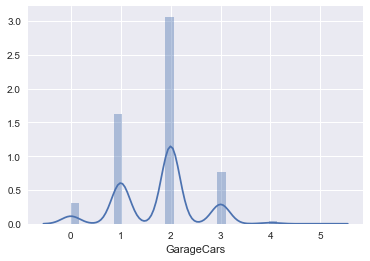

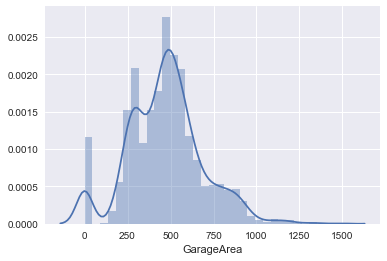

In [38]:
sns.distplot(data_test['GarageCars'].dropna())
plt.show()
sns.distplot(data_test['GarageArea'].dropna())
plt.show()

In [39]:
data_test['GarageCars'] = data_test['GarageCars'].fillna(data_test['GarageCars'].median())
data_test['GarageArea'] = data_test['GarageArea'].fillna(data_test['GarageArea'].median())

In [40]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageFinish    81
dtype: int64
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageFinish    78
SaleType         1
dtype: int64


In [41]:
print(data_train[data_train['BsmtExposure'].isnull()][['BsmtQual', 'BsmtExposure']])

     BsmtQual BsmtExposure
17        NaN          NaN
39        NaN          NaN
90        NaN          NaN
102       NaN          NaN
156       NaN          NaN
182       NaN          NaN
259       NaN          NaN
342       NaN          NaN
362       NaN          NaN
371       NaN          NaN
392       NaN          NaN
520       NaN          NaN
532       NaN          NaN
533       NaN          NaN
553       NaN          NaN
646       NaN          NaN
705       NaN          NaN
736       NaN          NaN
749       NaN          NaN
778       NaN          NaN
868       NaN          NaN
894       NaN          NaN
897       NaN          NaN
948        Gd          NaN
984       NaN          NaN
1000      NaN          NaN
1011      NaN          NaN
1035      NaN          NaN
1045      NaN          NaN
1048      NaN          NaN
1049      NaN          NaN
1090      NaN          NaN
1179      NaN          NaN
1216      NaN          NaN
1218      NaN          NaN
1232      NaN          NaN
1

In [42]:
data_train['BsmtQual'] = data_train['BsmtQual'].fillna('NA')
data_test['BsmtQual'] = data_test['BsmtQual'].fillna('NA')
data_train['BsmtCond'] = data_train['BsmtCond'].fillna('NA')
data_test['BsmtCond'] = data_test['BsmtCond'].fillna('NA')
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna('NA')
data_test['BsmtExposure'] = data_test['BsmtExposure'].fillna('NA')
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna('NA')
data_test['BsmtFinType1'] = data_test['BsmtFinType1'].fillna('NA')
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna('NA')
data_test['BsmtFinType2'] = data_test['BsmtFinType2'].fillna('NA')

In [43]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType       8
MasVnrArea       8
Electrical       1
GarageFinish    81
dtype: int64
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageFinish    78
SaleType         1
dtype: int64


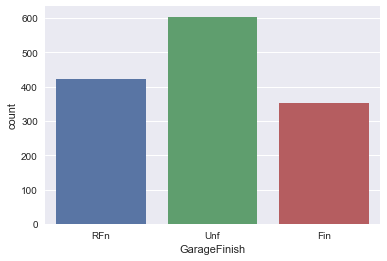

In [44]:
sns.countplot(data_train['GarageFinish'])

In [45]:
data_train['GarageFinish'] = data_train['GarageFinish'].fillna('Unf')
data_test['GarageFinish'] = data_test['GarageFinish'].fillna('Unf')

In [46]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
SaleType         1
dtype: int64


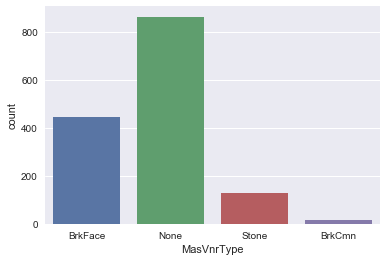

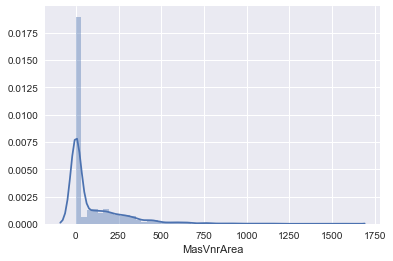

In [47]:
sns.countplot(data_train['MasVnrType'])
plt.show()
sns.distplot(data_train['MasVnrArea'].dropna())

In [48]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None')
data_test['MasVnrType'] = data_test['MasVnrType'].fillna('None')
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(0)
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(0)

In [49]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

Electrical    1
dtype: int64
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
SaleType        1
dtype: int64


In [50]:
test_col = ['Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
           'BsmtHalfBath', 'KitchenQual', 'Functional', 'SaleType']

for col in test_col:
    if data_test[col].dtype == np.dtype('O'):
        data_test[col] = data_test[col].fillna(data_test[col].value_counts().index[0])
    else:
        data_test[col] = data_test[col].fillna(data_test[col].median())

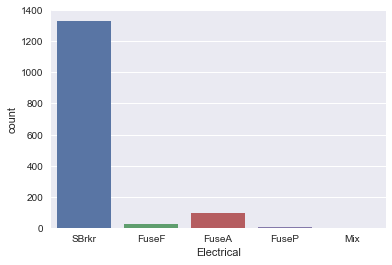

In [51]:
sns.countplot(data_train['Electrical'])

In [52]:
data_train['Electrical'].value_counts()
data_train[data_train['Electrical'] == 'Sbrkr']['Electrical'] = 'SBrkr'

In [53]:
data_train['Electrical'] = data_train['Electrical'].fillna('SBrkr')

In [54]:
data_train['Electrical'].value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [55]:
print(data_train.isnull().sum()[data_train.isnull().sum() > 0])
print(data_test.isnull().sum()[data_test.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


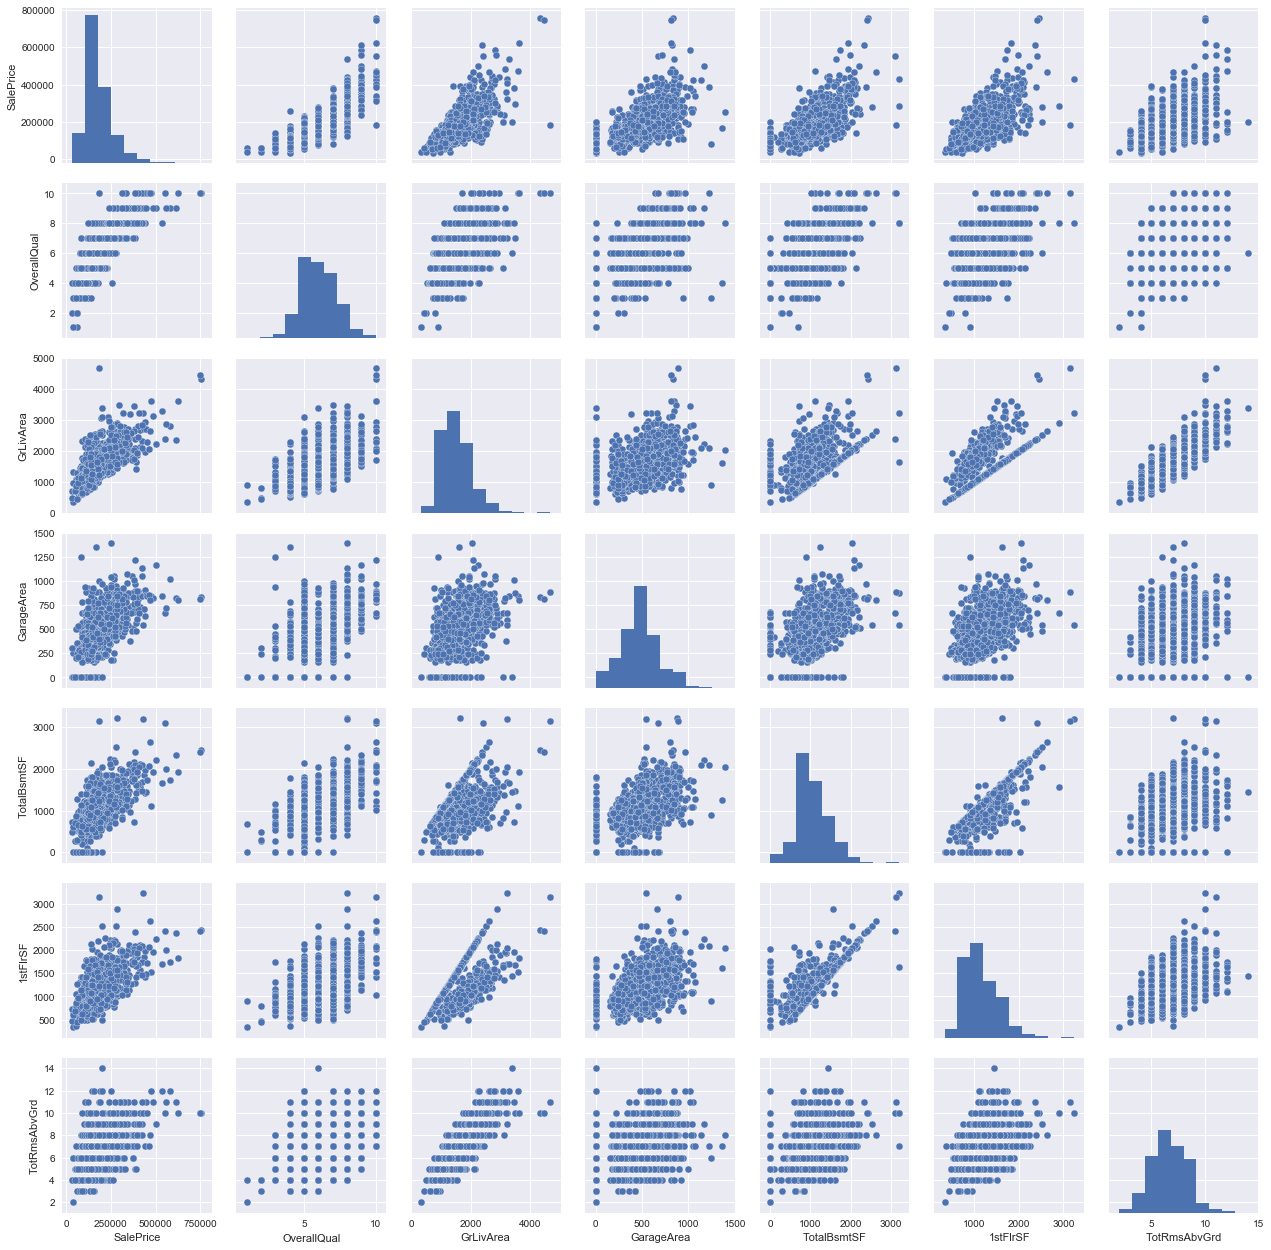

In [56]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
        'TotRmsAbvGrd']
sns.pairplot(data_train[cols], size=2.5)

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
        'TotRmsAbvGrd']

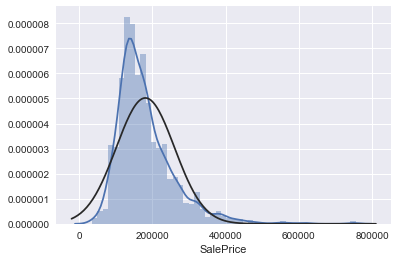

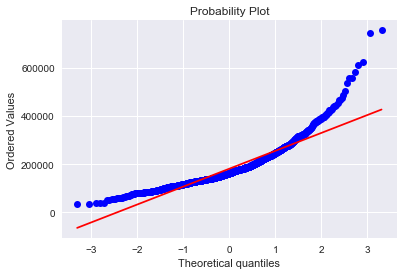

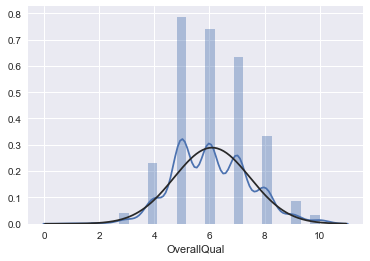

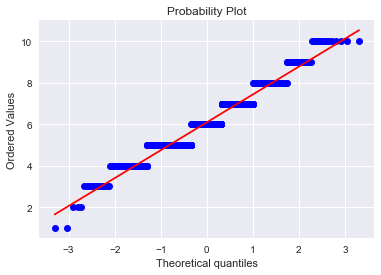

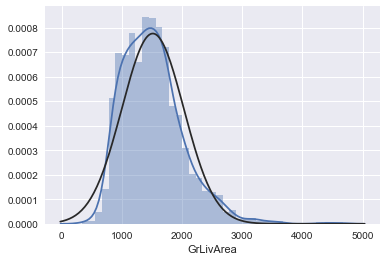

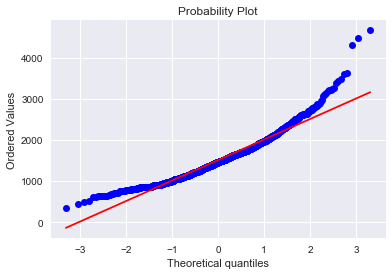

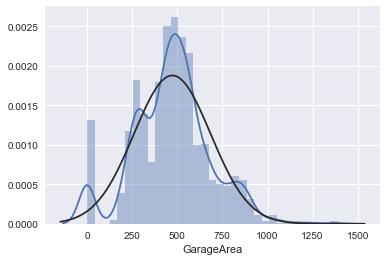

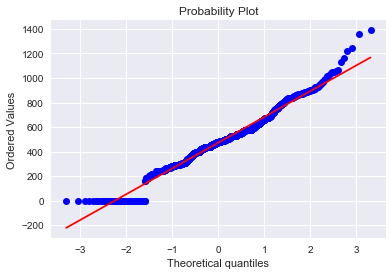

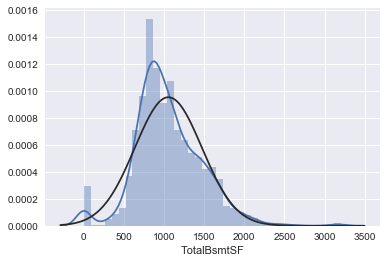

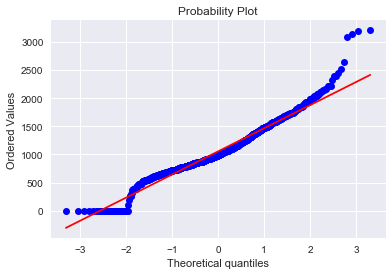

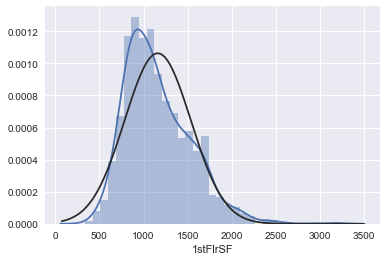

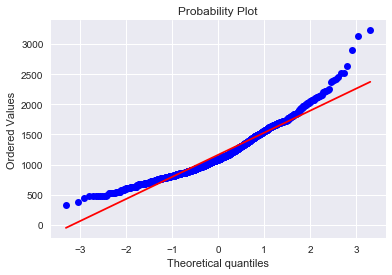

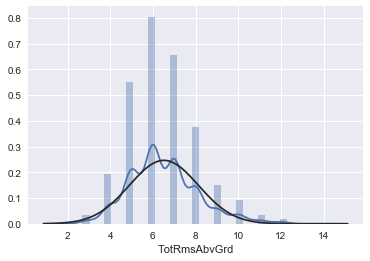

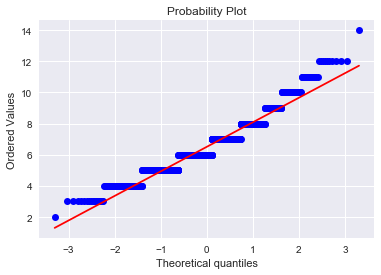

In [57]:
from scipy.stats import norm
from scipy import stats

for cor in cols:
    sns.distplot(data_train[cor].dropna(), fit=norm)
    plt.show()
    stats.probplot(data_train[cor], plot=plt)
    plt.show()

In [58]:
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 10.46027076,  10.47197813,  10.54273278, ...,  13.34550853,
          13.52114084,  13.53447435])),
 (0.39854301440571821, 12.02411810388627, 0.99540792280264478))

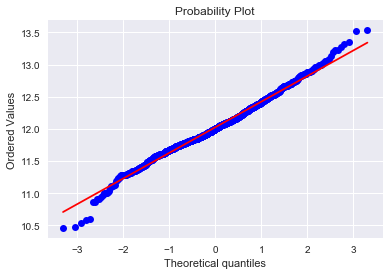

In [59]:
stats.probplot(data_train['SalePrice'], plot=plt)

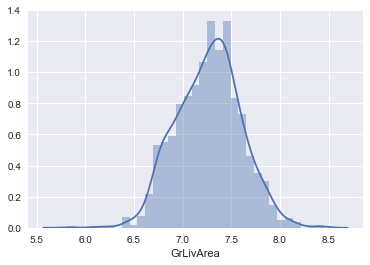

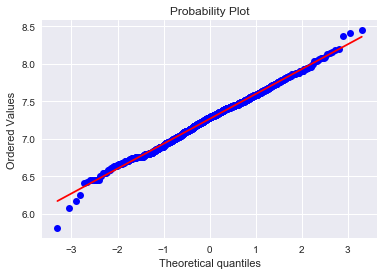

In [60]:
sns.distplot(np.log1p(data_train['GrLivArea']))
plt.show()
stats.probplot(np.log1p(data_train['GrLivArea']), plot=plt)
plt.show()

In [61]:
data_train['GrLivArea'] = np.log1p(data_train['GrLivArea'])
data_test['GrLivArea'] = np.log1p(data_test['GrLivArea'])

In [62]:
data_train['HasBsmt'] = data_train.apply(lambda x: 1 if x['TotalBsmtSF'] > 0 else 0, axis=1)

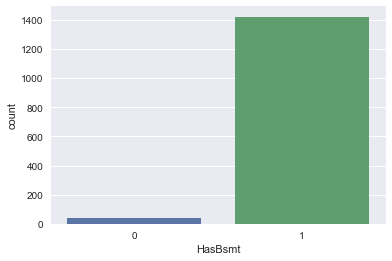

In [63]:
sns.countplot(data_train['HasBsmt'])

In [64]:
data_test['HasBsmt'] = data_test.apply(lambda x: 1 if x['TotalBsmtSF'] > 0 else 0, axis=1)

In [65]:
data_train.loc[data_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log1p(data_train['TotalBsmtSF'])
data_test.loc[data_test['HasBsmt']==1, 'TotalBsmtSF'] = np.log1p(data_test['TotalBsmtSF'])

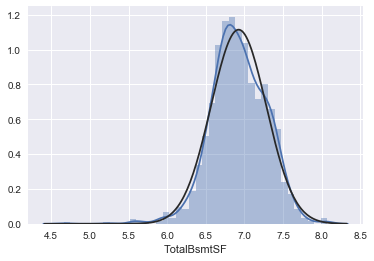

In [66]:
sns.distplot(data_train[data_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)

In [67]:
data_train['1stFlr_2ndFlr_Sf'] = np.log1p(data_train['1stFlrSF'] + data_train['2ndFlrSF'])
data_test['1stFlr_2ndFlr_Sf'] = np.log1p(data_test['1stFlrSF'] + data_test['2ndFlrSF'])

In [68]:
data_train['1stFlrSF'] = np.log1p(data_train['1stFlrSF'])
data_test['1stFlrSF'] = np.log1p(data_test['1stFlrSF'])

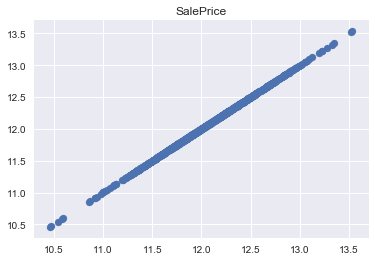

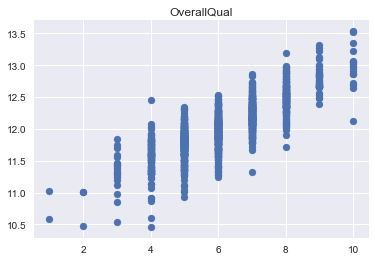

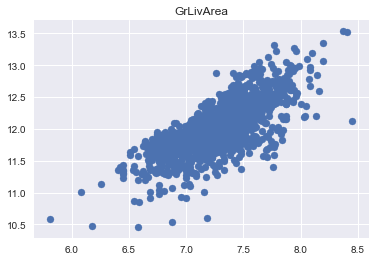

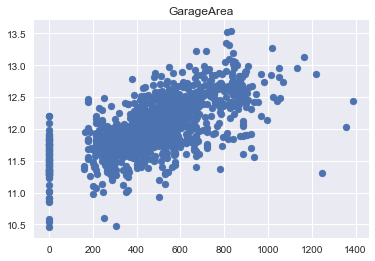

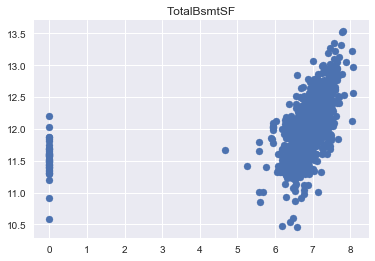

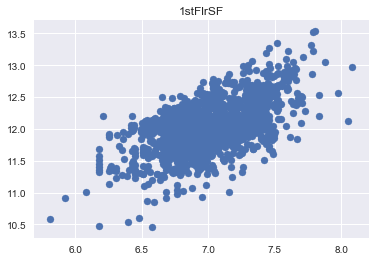

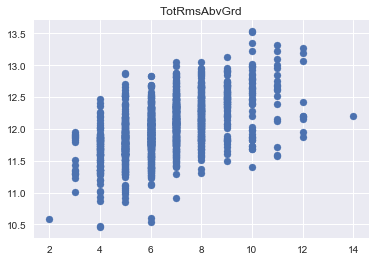

In [69]:
for col in cols:
    plt.scatter(x=data_train[col], y=data_train['SalePrice'])
    plt.title(col)
    plt.show()

In [70]:
df_all = pd.concat([data_train, data_test])

In [71]:
df_all = pd.get_dummies(df_all)

In [72]:
data_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Alley',
       u'LotShape', u'LandContour', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'BldgType', u'HouseStyle',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation',
       u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
       u'GarageQ

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
df_all.isnull().any()

1stFlrSF                 False
1stFlr_2ndFlr_Sf         False
2ndFlrSF                 False
3SsnPorch                False
BedroomAbvGr             False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtFullBath             False
BsmtHalfBath             False
BsmtUnfSF                False
EnclosedPorch            False
Fireplaces               False
FullBath                 False
GarageArea               False
GarageCars               False
GarageYrBlt              False
GrLivArea                False
HalfBath                 False
HasBsmt                  False
Id                       False
KitchenAbvGr             False
LotArea                  False
LotFrontage              False
LowQualFinSF             False
MSSubClass               False
MasVnrArea               False
MiscVal                  False
MoSold                   False
OpenPorchSF              False
OverallCond              False
                         ...  
PavedDrive_P             False
PavedDri

In [76]:
data_proto = pd.read_csv(train_path)
numeric_feat = data_proto.select_dtypes(exclude=[object]).columns.values

In [77]:
numeric_feat 

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [78]:
numeric_feat = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', '1stFlr_2ndFlr_Sf']

In [79]:
df_all.drop('SalePrice', axis=1, inplace=True)

In [80]:
df_all[numeric_feat] = scaler.fit_transform(df_all[numeric_feat])

In [81]:
y = data_train['SalePrice']

In [82]:
X_train = df_all[:data_train.shape[0]]

In [83]:
X_train.drop('Id', axis=1, inplace=True)

In [91]:
X_test.drop('Id', axis=1, inplace=True)

In [84]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [85]:
param_grid = {'alpha': [0.5, 1, 2, 6, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150]}
ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring="neg_mean_squared_error")
ridge.fit(X_train, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.5, 1, 2, 6, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [86]:
print(ridge.best_score_)
print(ridge.best_params_)

-0.0150418801624
{'alpha': 2}


In [87]:
X_test = df_all[data_train.shape[0]:]

In [79]:
best_regressor = ridge.best_estimator_
y_test = best_regressor.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [86]:
regr = XGBRegressor(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1.5,
                    gamma=0.1, 
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=4,
                    seed=27)
regr.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1.5, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [87]:
y_pred = regr.predict(X_train)
print("XGBoost score on training set: ", rmse(y, y_pred))

('XGBoost score on training set: ', 0.076025864551384187)


In [92]:
y_test_xgb = regr.predict(X_test)

In [95]:
y_test_xgb = np.expm1(y_test_xgb)

In [ ]:
result_df = pd.DataFrame(columns=['Id', 'SalePrice'])
result_df.Id = data_test.Id
result_df.SalePrice = y_test_xgb
result_df.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.metrics import make_scorer

rmse_loss = make_scorer(rmse, greater_is_better=False)

param_test1 = {'max_depth': range(3,10,2), 'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(XGBRegressor(learning_rate=0.1, n_estimators=100, gamma=0.1, subsample=0.8, 
                                     colsample_bytree=0.8, nthread=4, seed=27), param_grid=param_test1, 
                                     scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)
gsearch1.fit(X_train, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [91]:
y.head(5)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [90]:
y.to_csv('y.csv')

In [88]:
X_train.to_csv('X_train.csv')

In [89]:
X_test.to_csv('X_test.csv')

In [81]:
y_test = np.expm1(y_test)

In [82]:
y_test

array([ 116028.86305015,  155565.67095091,  178880.57056154, ...,
        168080.63736015,  115332.48885329,  217939.79284921])

In [83]:
result_df = pd.DataFrame(columns=['Id', 'SalePrice'])
result_df.Id = data_test.Id
result_df.SalePrice = y_test

In [84]:
result_df.head(5)

,Id,SalePrice
0,1461,116028.863050
1,1462,155565.670951
2,1463,178880.570562
3,1464,198133.499980
4,1465,196324.958314


In [85]:
result_df.to_csv('submission.csv')

In [97]:
param_grid = {'alpha': [0.005, 0.01, 0.05, 1]}
ls = GridSearchCV(Lasso(), param_grid, cv=5, scoring="neg_mean_squared_error")
ls.fit(X_train, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.005, 0.01, 0.05, 1]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [99]:
print(ls.best_score_)
print(ls.best_params_)
best_regressor = ls.best_estimator_
y_pred = best_regressor.predict(X_train)
print(rmse(y, y_pred))

-0.0237806237102
{'alpha': 0.005}
0.148722549839


In [94]:
from sklearn import metrics
print(metrics.r2_score(y_pred, y))

0.802740517029


In [96]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
param_grid = {'n_estimators': [100,200,300,500],
              'min_samples_leaf': [1,3,5]}
fs = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')
fs.fit(X_train, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 500], 'min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [102]:
print(fs.best_params_)
print(fs.best_score_)
best_ridge_regressor = ridge.best_estimator_
best_tree_regressor = fs.best_estimator_
y_pred = best_regressor.predict(X_train)
print(metrics.r2_score(y_pred, y))

{'n_estimators': 500, 'min_samples_leaf': 1}
-0.0200160326814
0.981044352944


In [104]:
y_tree_test = np.expm1(best_tree_regressor.predict(X_test))
y_ridge_test = np.expm1(best_ridge_regressor.predict(X_test))
y_final = y_tree_test*0.3 + y_ridge_test*0.7
result_df = pd.DataFrame(columns=['Id', 'SalePrice'])
result_df.Id = data_test.Id
result_df.SalePrice = y_final
result_df.to_csv('submission.csv', index=False)

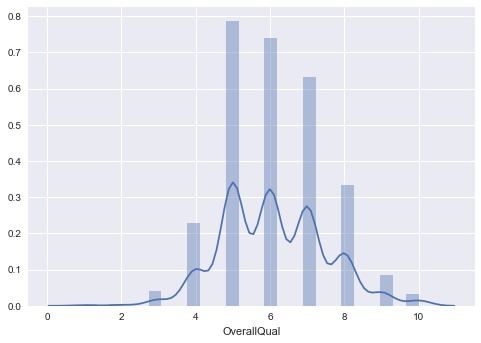

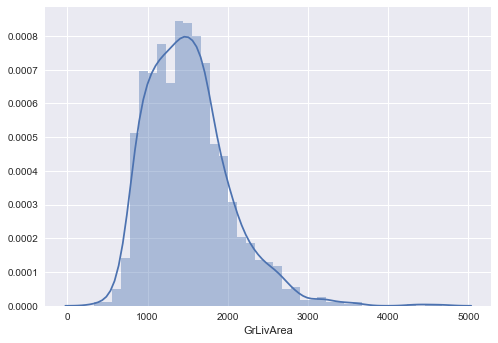

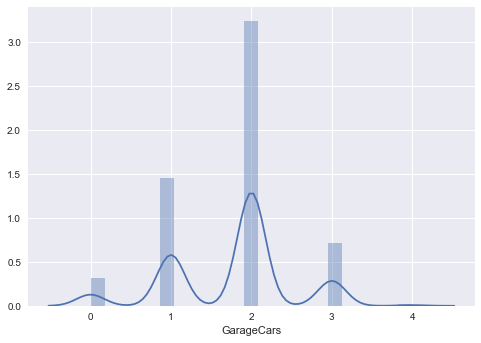

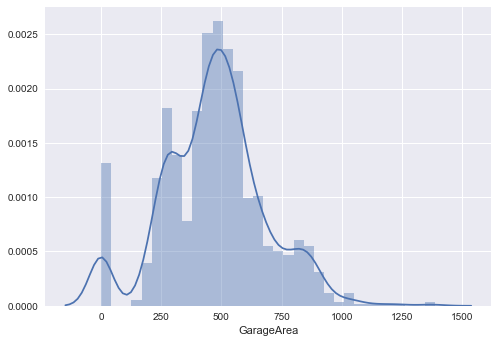

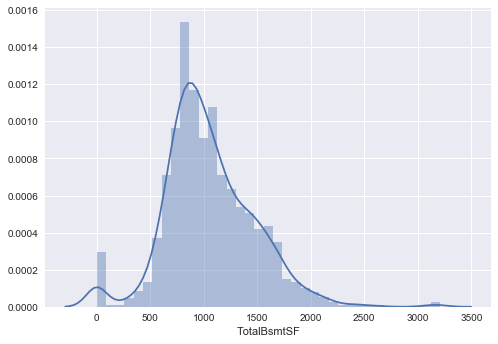

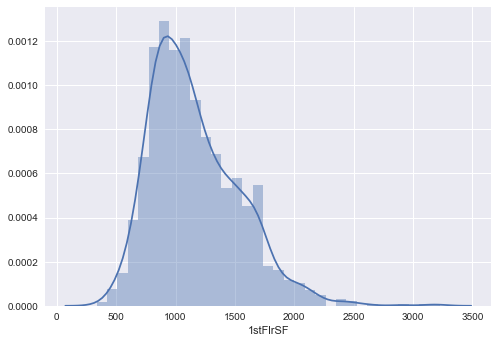

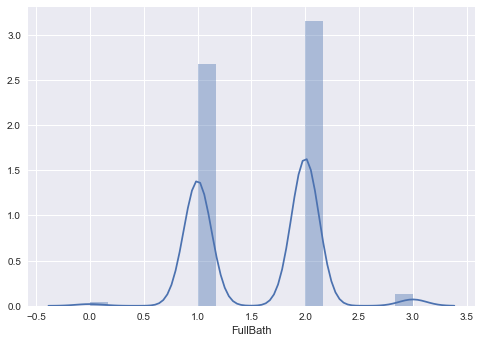

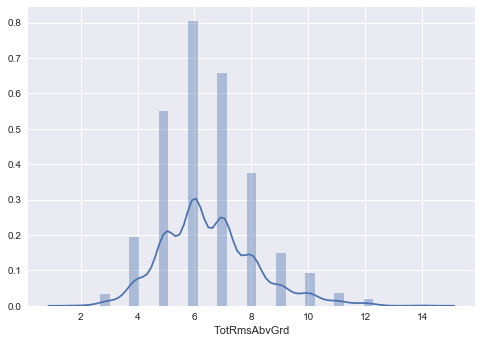

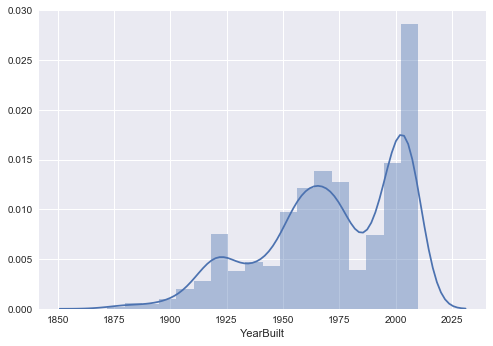

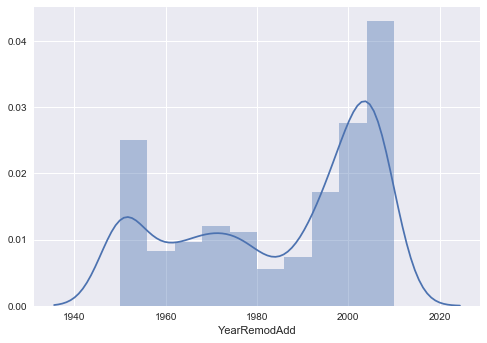

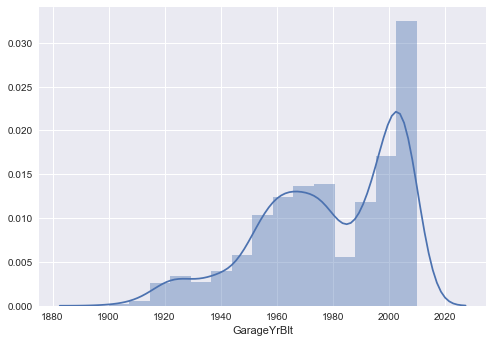

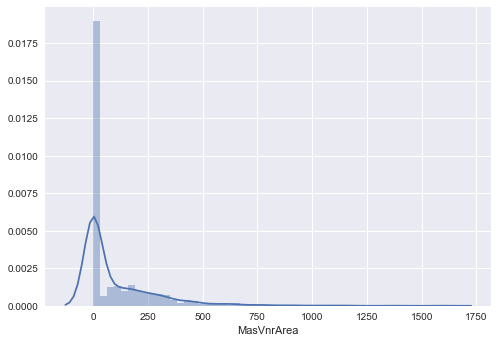

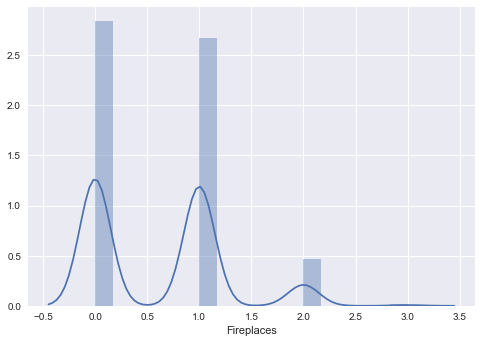

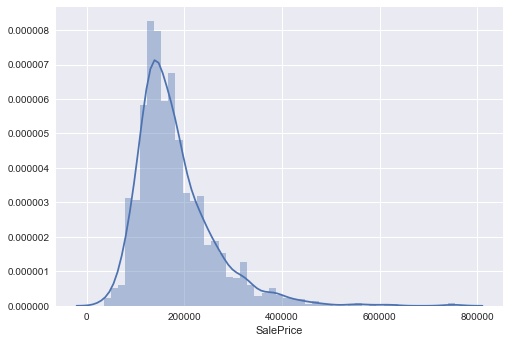

In [24]:
for cor in cols:
    sns.distplot(data_train[cor].dropna())
    plt.show()

In [25]:
print("Skew")
for cor in cols:
    print("%s: %f" %(cor,data_train[cor].skew()))

Skew
OverallQual: 0.208743
GrLivArea: 1.119893
GarageCars: -0.341141
GarageArea: 0.131765
TotalBsmtSF: 0.573204
1stFlrSF: 0.951447
FullBath: 0.039160
TotRmsAbvGrd: 0.664867
YearBuilt: -0.614413
YearRemodAdd: -0.504174
GarageYrBlt: -0.650932
MasVnrArea: 2.676765
Fireplaces: 0.631255
SalePrice: 1.880787


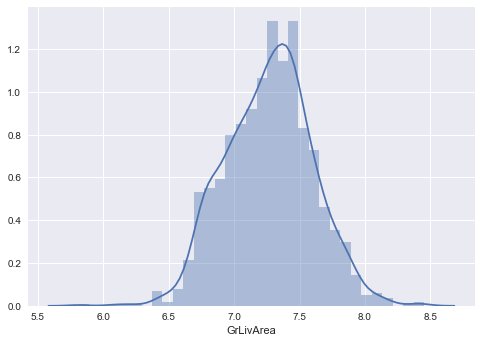

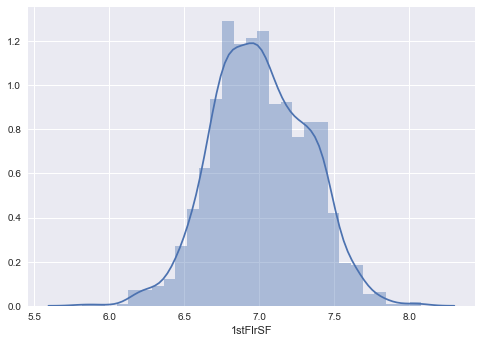

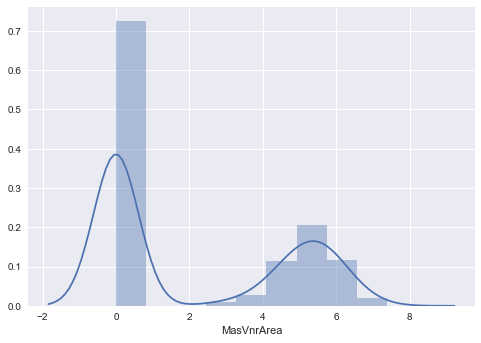

In [27]:
sns.distplot(np.log1p(data_train['GrLivArea']).dropna())
plt.show()
sns.distplot(np.log1p(data_train['1stFlrSF']).dropna())
plt.show()
sns.distplot(np.log1p(data_train['MasVnrArea']).dropna())
plt.show()

NameError: name 'sns' is not defined

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

* **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.
* **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
* **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.
* **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.
